<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Keys" data-toc-modified-id="Keys-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Keys</a></span></li><li><span><a href="#FPKM-normalization" data-toc-modified-id="FPKM-normalization-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>FPKM normalization</a></span><ul class="toc-item"><li><span><a href="#Function---FPKM-tool" data-toc-modified-id="Function---FPKM-tool-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Function - FPKM tool</a></span></li><li><span><a href="#Extracting-the-FPKM-of-raw-read-counts" data-toc-modified-id="Extracting-the-FPKM-of-raw-read-counts-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Extracting the FPKM of raw read counts</a></span></li><li><span><a href="#Correlation-between-replicates-(FPKM-of-raw-reads)" data-toc-modified-id="Correlation-between-replicates-(FPKM-of-raw-reads)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Correlation between replicates (FPKM of raw reads)</a></span></li><li><span><a href="#Taking-the-average-FPKM-of-CC-2931-&amp;-CC-2344-files" data-toc-modified-id="Taking-the-average-FPKM-of-CC-2931-&amp;-CC-2344-files-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Taking the average FPKM of CC-2931 &amp; CC-2344 files</a></span></li><li><span><a href="#Plots" data-toc-modified-id="Plots-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Plots</a></span><ul class="toc-item"><li><span><a href="#Comparing-the-FPKM-between-ancestral-replicates" data-toc-modified-id="Comparing-the-FPKM-between-ancestral-replicates-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Comparing the FPKM between ancestral replicates</a></span></li></ul></li></ul></li><li><span><a href="#FPKM-percentile-bins" data-toc-modified-id="FPKM-percentile-bins-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>FPKM percentile bins</a></span></li><li><span><a href="#Analysis" data-toc-modified-id="Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Analysis</a></span><ul class="toc-item"><li><span><a href="#Checking-the-number-of-DEGs-per-FPKM-percentile-bin" data-toc-modified-id="Checking-the-number-of-DEGs-per-FPKM-percentile-bin-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Checking the number of DEGs per FPKM percentile bin</a></span><ul class="toc-item"><li><span><a href="#Plots" data-toc-modified-id="Plots-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Plots</a></span></li></ul></li><li><span><a href="#Distribution-across-FPKM-bins" data-toc-modified-id="Distribution-across-FPKM-bins-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Distribution across FPKM bins</a></span><ul class="toc-item"><li><span><a href="#Log2-fold-change-across-FPKM-percentile-bins" data-toc-modified-id="Log2-fold-change-across-FPKM-percentile-bins-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Log<sub>2</sub> fold change across FPKM percentile bins</a></span></li><li><span><a href="#Absolute-log2-fold-change-across-FPKM-percentile-bins" data-toc-modified-id="Absolute-log2-fold-change-across-FPKM-percentile-bins-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Absolute log<sub>2</sub> fold change across FPKM percentile bins</a></span></li><li><span><a href="#Sum-of-absolute-value-log2-fold-change-among-FPKM-bins" data-toc-modified-id="Sum-of-absolute-value-log2-fold-change-among-FPKM-bins-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Sum of absolute value log<sub>2</sub> fold change among FPKM bins</a></span></li><li><span><a href="#Mutational-variance-across-FPKM-percentile-bins" data-toc-modified-id="Mutational-variance-across-FPKM-percentile-bins-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Mutational variance across FPKM percentile bins</a></span></li><li><span><a href="#Ka/Ks-over-FPKM-percentile-bins" data-toc-modified-id="Ka/Ks-over-FPKM-percentile-bins-4.2.5"><span class="toc-item-num">4.2.5&nbsp;&nbsp;</span>K<sub>a</sub>/K<sub>s</sub> over FPKM percentile bins</a></span></li></ul></li></ul></li></ul></div>

# Keys

In [1]:
import json
import pandas as pd
import numpy as np
from numpy import random
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.figure import Figure
from matplotlib.ticker import MaxNLocator
from matplotlib.gridspec import GridSpec
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import brunnermunzel
from scipy.stats import fligner
from scipy.stats import skewtest
stats.junk = lambda chisq, df: stats.chi2.sf(chisq, df)
import csv
import gffpandas.gffpandas as gffpd
import sklearn
from sklearn.metrics import r2_score
import os
import statistics
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

CC2344 = ["CC2344-L1", "CC2344-L2", "CC2344-L3", "CC2344-L4", "CC2344-L5", "CC2344-L6", "CC2344-L7", "CC2344-L8", "CC2344-L9", "CC2344-L10", "CC2344-L11", "CC2344-L12", "CC2344-L13", "CC2344-L14", "CC2344-L15"]
CC2931 = ["CC2931-L1", "CC2931-L2", "CC2931-L3", "CC2931-L4", "CC2931-L5", "CC2931-L6", "CC2931-L7", "CC2931-L9", "CC2931-L10", "CC2931-L11", "CC2931-L13", "CC2931-L14", "CC2931-L15"]

#### Generation time per sample ####
dic_gen = {}
generation = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/Mutation_Fitness.txt', delimiter = '\t')
generation['Sample'] = generation['Sample'].str.replace('_', '-L')
generation = generation.loc[generation['Sample'].isin(CC2344 + CC2931)]

for i in generation.index.values:
    dic_gen[generation.at[i,'Sample']] = generation.at[i, 'Generation']
    
generations = pd.Series(dic_gen)

#### Mutation count per sample ####
mutations = pd.read_csv('/research/projects/chlamydomonas/MAexpression/genome_info/mutation_info/all_mutations.csv', delimiter = '\t')
dic_mut = {maline:mutations.loc[mutations['sample'] == maline].count()[0] for maline in mutations['sample'].values.tolist()}

# FPKM normalization

## Function - FPKM tool

In [2]:
def fpkm(gene_count, fragment_length):
    ''' Fragments Per Kilobase of transcript per Million mapped reads '''
    gene_count = gene_count.join([fragment_length])
    gene_count.index.names = ['index']
    gene_count = gene_count.reset_index()

    gene_count.loc['sum'] = gene_count.sum(axis = 0)
    gene_count[gene_count.columns[1:]] = gene_count[gene_count.columns[1:]].astype(int)

    ## MULTIPLY BY 10^(9)
    gene_count.loc['sum', gene_count.columns[1:-1]] = pow(10,9)/gene_count.loc['sum'][gene_count.columns[1:-1]]
    FPKM = gene_count[:-1][gene_count.columns[1:-1]]

    ## DIVIDE BY TOTAL_READS
    for i in FPKM.columns:
        FPKM[i] = FPKM[i]*gene_count.at['sum', i]

    ## DIVIDE BY GENE_LENGTH
    for i in list(FPKM.index.values):
        FPKM.iloc[i] = FPKM.iloc[i]/gene_count.at[i, 'Length']

    FPKM = pd.concat([FPKM, gene_count['index'][:-1]], axis = 1)

    # REDO COLUMN LABELS
    FPKM = FPKM.set_index('index')
    columns = FPKM.columns.str.replace('_','-', regex = True)
    FPKM.columns = columns
    return FPKM

## Extracting the FPKM of raw read counts

In [4]:
#### Isolating the genes kept after DESeq2 pre-filtering ####
CC2344_l2f = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/raw_counts/CC2344_log2Fold', delimiter = '\t')
CC2931_l2f = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/raw_counts/CC2931_log2Fold', delimiter = '\t')
CC2344_deseq_filtered_index = CC2344_l2f['Unnamed: 0']
CC2931_deseq_filtered_index = CC2931_l2f['Unnamed: 0']

#### FPKM of raw reads ####
CC2344_counts = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/raw_counts/unnormalized_CC2344_raw.txt', delimiter = '\t', index_col = 'geneid')
CC2931_counts = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/raw_counts/unnormalized_CC2931_raw.txt', delimiter = '\t', index_col = 'geneid')
fragment_length = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/fpkm/fragment_length.csv', delimiter = '\t', index_col = 'index')

CC2344_FPKM = fpkm(CC2344_counts, fragment_length)
CC2931_FPKM = fpkm(CC2931_counts, fragment_length)

CC2931_FPKM = CC2931_FPKM.dropna()
CC2344_FPKM = CC2344_FPKM.dropna()

#### Prefiltering FPKM of raw reads ####
CC2344_FPKM_deseq_filtered = CC2344_FPKM.loc[CC2344_deseq_filtered_index]
CC2931_FPKM_deseq_filtered = CC2931_FPKM.loc[CC2931_deseq_filtered_index]

#### Exporting ####
CC2931_FPKM_deseq_filtered.to_csv('/research/projects/chlamydomonas/MAexpression/analysis/fpkm/CC2931_fpkm', sep = '\t', index = True, header = True)
CC2344_FPKM_deseq_filtered.to_csv('/research/projects/chlamydomonas/MAexpression/analysis/fpkm/CC2344_fpkm', sep = '\t', index = True, header = True)

NameError: name 'fpkm' is not defined

## Correlation between replicates (FPKM of raw reads)

In [6]:
CC2344 = ['CC2344-ANC', "CC2344-L1", "CC2344-L2", "CC2344-L3", "CC2344-L4", "CC2344-L5", "CC2344-L6", "CC2344-L7", "CC2344-L8", "CC2344-L9", "CC2344-L10", "CC2344-L11", "CC2344-L12", "CC2344-L13", "CC2344-L14", "CC2344-L15"]
CC2931 = ["CC2931-ANC", "CC2931-L1", "CC2931-L2", "CC2931-L3", "CC2931-L4", "CC2931-L5", "CC2931-L6", "CC2931-L7", "CC2931-L9", "CC2931-L10", "CC2931-L11", "CC2931-L13", "CC2931-L14", "CC2931-L15"]

#################################################################################################
#### Checking the correlation between the raw and DESeq2 filtered reads of sample replicates ####
#################################################################################################
CC2344_fpkm = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/fpkm/CC2344_fpkm', delimiter = '\t', index_col = 'index')
CC2931_fpkm = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/fpkm/CC2931_fpkm', delimiter = '\t', index_col = 'index')

correlation_between_replicates = pd.DataFrame(columns = ['rep2/3', 'rep1/3', 'rep1/2'])

for i in CC2931:
    correlation_between_replicates.at[i, 'rep2/3'] =  scipy.stats.pearsonr(CC2931_fpkm[i + '-rep2'], CC2931_fpkm[i + '-rep3'])
    correlation_between_replicates.at[i, 'rep1/3'] =  scipy.stats.pearsonr(CC2931_fpkm[i + '-rep1'], CC2931_fpkm[i + '-rep3'])
    correlation_between_replicates.at[i, 'rep1/2'] =  scipy.stats.pearsonr(CC2931_fpkm[i + '-rep1'], CC2931_fpkm[i + '-rep2'])
    
for i in CC2344:
    correlation_between_replicates.at[i, 'rep2/3'] =  scipy.stats.pearsonr(CC2344_fpkm[i + '-rep2'], CC2344_fpkm[i + '-rep3'])
    correlation_between_replicates.at[i, 'rep1/3'] =  scipy.stats.pearsonr(CC2344_fpkm[i + '-rep1'], CC2344_fpkm[i + '-rep3'])
    correlation_between_replicates.at[i, 'rep1/2'] =  scipy.stats.pearsonr(CC2344_fpkm[i + '-rep1'], CC2344_fpkm[i + '-rep2'])
    
# CC2931-L3 rep3 is poorly correlated (r = 0.80); CC2344-L6 rep2 is poorly correlated (r ~ 0.78)

## Taking the average FPKM of CC-2931 & CC-2344 files

In [5]:
#### List of MA samples and their unmutated ancestors ####
CC2344 = ['CC2344-ANC', "CC2344-L1", "CC2344-L2", "CC2344-L3", "CC2344-L4", "CC2344-L5", "CC2344-L6", "CC2344-L7", "CC2344-L8", "CC2344-L9", 'CC2344-L10', "CC2344-L11", 'CC2344-L12', "CC2344-L13", "CC2344-L14", "CC2344-L15"]
CC2931 = ["CC2931-ANC", "CC2931-L1", "CC2931-L2", 'CC2931-L3', "CC2931-L4", "CC2931-L5", "CC2931-L6", "CC2931-L7", "CC2931-L9", "CC2931-L10", "CC2931-L11", "CC2931-L13", "CC2931-L14", "CC2931-L15"]

CC2931_FPKM = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/fpkm/CC2931_fpkm', delimiter = '\t', index_col = 'index')
CC2344_FPKM = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/fpkm/CC2344_fpkm', delimiter = '\t', index_col = 'index')

for i in ['CC2344_avg_fpkm', 'CC2931_avg_fpkm']:
    exec('{} = pd.DataFrame()'.format(i))

#### Taking the average of sample replicates ####
for i in CC2344 + CC2931:
    if 'CC2931' in i:
        CC2931_avg_fpkm[i] = CC2931_FPKM[[i + '-rep1', i + '-rep2', i + '-rep3']].mean(axis = 1)
    if 'CC2344' in i:
        CC2344_avg_fpkm[i] = CC2344_FPKM[[i + '-rep1', i + '-rep2', i + '-rep3']].mean(axis = 1)
        
CC2931_avg_fpkm.to_csv('/research/projects/chlamydomonas/MAexpression/analysis/fpkm/CC2931_avg_fpkm', sep = '\t', index = True, header = True)
CC2344_avg_fpkm.to_csv('/research/projects/chlamydomonas/MAexpression/analysis/fpkm/CC2344_avg_fpkm', sep = '\t', index = True, header = True)

## Plots

### Comparing the FPKM between ancestral replicates

/home/balogu15/.conda/envs/personal/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-8-d62bba69aedf>:14: RuntimeWarning: divide by zero encountered in log
  a = a.replace(np.log(0), np.nan) ## replace np.log(0) with nothing
<ipython-input-8-d62bba69aedf>:15: RuntimeWarning: divide by zero encountered in log
  b = b.replace(np.log(0), np.nan)
<ipython-input-8-d62bba69aedf>:16: RuntimeWarning: divide by zero encountered in log
  c = c.replace(np.log(0), np.nan)
<ipython-input-8-d62bba69aedf>:17: RuntimeWarning: divide by zero encountered in log
  d = d.replace(np.log(0), np.nan)
<ipython-input-8-d62bba69aedf>:18: RuntimeWarning: divide by zero encountered in log
  e = e.replace(np.log(0), np.nan)
<ipython-input-8-d62bba69aedf>:19: RuntimeWarning: divide by zero encountered in log
  f = f.replace(np.log(0), np.nan)


Text(-1, 5, 'r = 0.956')

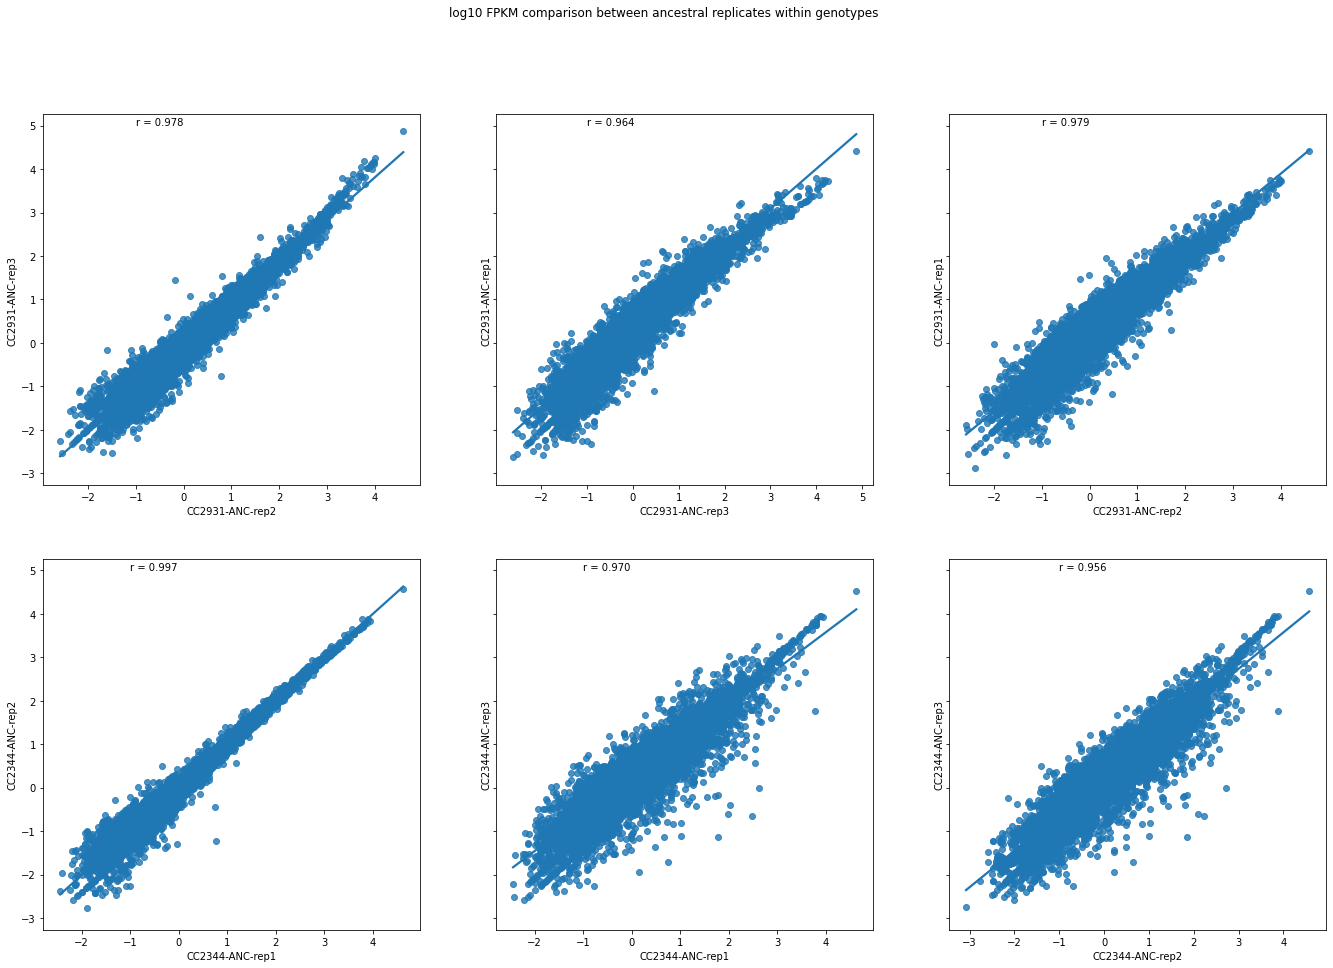

In [8]:
CC2931_FPKM = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/fpkm/CC2931_fpkm', delimiter = '\t')
CC2344_FPKM = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/fpkm/CC2344_fpkm', delimiter = '\t')
CC2931_FPKM = CC2931_FPKM.dropna()
CC2344_FPKM = CC2344_FPKM.dropna()

#### Taking the log10 of values and excluding zeros ####
a = np.log10(CC2931_FPKM['CC2931-ANC-rep2'])
b = np.log10(CC2931_FPKM['CC2931-ANC-rep3'])
c = np.log10(CC2931_FPKM['CC2931-ANC-rep1'])
d = np.log10(CC2344_FPKM['CC2344-ANC-rep1'])
e = np.log10(CC2344_FPKM['CC2344-ANC-rep2'])
f = np.log10(CC2344_FPKM['CC2344-ANC-rep3'])

a = a.replace(np.log(0), np.nan) ## replace np.log(0) with nothing
b = b.replace(np.log(0), np.nan)
c = c.replace(np.log(0), np.nan)
d = d.replace(np.log(0), np.nan)
e = e.replace(np.log(0), np.nan)
f = f.replace(np.log(0), np.nan)

#### Pearson's correlation is based on the log10 scaled values ####
fig, axes = plt.subplots(2, 3, figsize=(23, 15), sharey=True)
fig.suptitle('log10 FPKM comparison between ancestral replicates within genotypes')

sns.regplot(ax = axes[0,0], data = CC2931_FPKM, x = a, y = b, ci = False)
axes[0,0].annotate("r = {:.3f}".format(scipy.stats.pearsonr(CC2931_FPKM['CC2931-ANC-rep2'], CC2931_FPKM['CC2931-ANC-rep3'])[0]), (-1,5))

sns.regplot(ax = axes[0,1], data = CC2931_FPKM, x = b, y = c, ci = False)
axes[0,1].annotate("r = {:.3f}".format(scipy.stats.pearsonr(CC2931_FPKM['CC2931-ANC-rep3'], CC2931_FPKM['CC2931-ANC-rep1'])[0]), (-1,5))

sns.regplot(ax = axes[0,2], data = CC2931_FPKM, x = a, y = c, ci = False)
axes[0,2].annotate("r = {:.3f}".format(scipy.stats.pearsonr(CC2931_FPKM['CC2931-ANC-rep2'], CC2931_FPKM['CC2931-ANC-rep1'])[0]), (-1,5))

sns.regplot(ax = axes[1,0], data = CC2344_FPKM, x = d, y = e, ci = False)
axes[1,0].annotate("r = {:.3f}".format(scipy.stats.pearsonr(CC2344_FPKM['CC2344-ANC-rep1'], CC2344_FPKM['CC2344-ANC-rep2'])[0]), (-1,5))

sns.regplot(ax = axes[1,1], data = CC2344_FPKM, x = d, y = f, ci = False)
axes[1,1].annotate("r = {:.3f}".format(scipy.stats.pearsonr(CC2344_FPKM['CC2344-ANC-rep1'], CC2344_FPKM['CC2344-ANC-rep3'])[0]), (-1,5))

sns.regplot(ax = axes[1,2], data = CC2344_FPKM, x = e, y = f, ci = False)
axes[1,2].annotate("r = {:.3f}".format(scipy.stats.pearsonr(CC2344_FPKM['CC2344-ANC-rep2'], CC2344_FPKM['CC2344-ANC-rep3'])[0]), (-1,5))

# fig.savefig('/research/projects/chlamydomonas/MAexpression/analysis/fpkm/within_genotype_ancestral_replicate_comparison.pdf', format = 'pdf', dpi = 150, bbox_inches = 'tight')

# FPKM percentile bins

In [2]:
CC2931_avg_fpkm = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/fpkm/CC2931_avg_fpkm', delimiter = '\t')
CC2344_avg_fpkm = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/fpkm/CC2344_avg_fpkm', delimiter = '\t')

############################################
## CC-2931 - FPKM percentile distribution ##
############################################
percentile_10 = np.percentile(CC2931_avg_fpkm['CC2931-ANC'], 10)
percentile_20 = np.percentile(CC2931_avg_fpkm['CC2931-ANC'], 20)
percentile_30 = np.percentile(CC2931_avg_fpkm['CC2931-ANC'], 30)
percentile_40 = np.percentile(CC2931_avg_fpkm['CC2931-ANC'], 40)
percentile_50 = np.percentile(CC2931_avg_fpkm['CC2931-ANC'], 50)
percentile_60 = np.percentile(CC2931_avg_fpkm['CC2931-ANC'], 60)
percentile_70 = np.percentile(CC2931_avg_fpkm['CC2931-ANC'], 70)
percentile_80 = np.percentile(CC2931_avg_fpkm['CC2931-ANC'], 80)
percentile_90 = np.percentile(CC2931_avg_fpkm['CC2931-ANC'], 90)

CC2931_bins = {}
sec_10 = CC2931_avg_fpkm.loc[CC2931_avg_fpkm['CC2931-ANC'] <= percentile_10]
CC2931_bins['perc_10'] = sec_10['index'].values.tolist()
sec_20 = CC2931_avg_fpkm.loc[(percentile_10 < CC2931_avg_fpkm['CC2931-ANC']) & (CC2931_avg_fpkm['CC2931-ANC'] <= percentile_20)]
CC2931_bins['perc_20'] = sec_20['index'].values.tolist()
sec_30 = CC2931_avg_fpkm.loc[(percentile_20 < CC2931_avg_fpkm['CC2931-ANC']) & (CC2931_avg_fpkm['CC2931-ANC'] <= percentile_30)]
CC2931_bins['perc_30'] = sec_30['index'].values.tolist()
sec_40 = CC2931_avg_fpkm.loc[(percentile_30 < CC2931_avg_fpkm['CC2931-ANC']) & (CC2931_avg_fpkm['CC2931-ANC'] <= percentile_40)]
CC2931_bins['perc_40'] = sec_40['index'].values.tolist()
sec_50 = CC2931_avg_fpkm.loc[(percentile_40 < CC2931_avg_fpkm['CC2931-ANC']) & (CC2931_avg_fpkm['CC2931-ANC'] <= percentile_50)]
CC2931_bins['perc_50'] = sec_50['index'].values.tolist()
sec_60 = CC2931_avg_fpkm.loc[(percentile_50 < CC2931_avg_fpkm['CC2931-ANC']) & (CC2931_avg_fpkm['CC2931-ANC'] <= percentile_60)]
CC2931_bins['perc_60'] = sec_60['index'].values.tolist()
sec_70 = CC2931_avg_fpkm.loc[(percentile_60 < CC2931_avg_fpkm['CC2931-ANC']) & (CC2931_avg_fpkm['CC2931-ANC'] <= percentile_70)]
CC2931_bins['perc_70'] = sec_70['index'].values.tolist()
sec_80 = CC2931_avg_fpkm.loc[(percentile_70 < CC2931_avg_fpkm['CC2931-ANC']) & (CC2931_avg_fpkm['CC2931-ANC'] <= percentile_80)]
CC2931_bins['perc_80'] = sec_80['index'].values.tolist()
sec_90 = CC2931_avg_fpkm.loc[(percentile_80 < CC2931_avg_fpkm['CC2931-ANC']) & (CC2931_avg_fpkm['CC2931-ANC'] <= percentile_90)]
CC2931_bins['perc_90'] = sec_90['index'].values.tolist()
sec_100 = CC2931_avg_fpkm.loc[CC2931_avg_fpkm['CC2931-ANC'] > percentile_90]
CC2931_bins['perc_100'] = sec_100['index'].values.tolist()

CC2931_bins_df = pd.DataFrame(dict([(k,pd.Series(v)) for k, v in CC2931_bins.items()]))
CC2931_bins_df.to_csv('/research/projects/chlamydomonas/MAexpression/analysis/fpkm/CC2931_bins', sep = '\t', header = True)

############################################
## CC-2344 - FPKM percentile distribution ##
############################################
percentile_10 = np.percentile(CC2344_avg_fpkm['CC2344-ANC'], 10)
percentile_20 = np.percentile(CC2344_avg_fpkm['CC2344-ANC'], 20)
percentile_30 = np.percentile(CC2344_avg_fpkm['CC2344-ANC'], 30)
percentile_40 = np.percentile(CC2344_avg_fpkm['CC2344-ANC'], 40)
percentile_50 = np.percentile(CC2344_avg_fpkm['CC2344-ANC'], 50)
percentile_60 = np.percentile(CC2344_avg_fpkm['CC2344-ANC'], 60)
percentile_70 = np.percentile(CC2344_avg_fpkm['CC2344-ANC'], 70)
percentile_80 = np.percentile(CC2344_avg_fpkm['CC2344-ANC'], 80)
percentile_90 = np.percentile(CC2344_avg_fpkm['CC2344-ANC'], 90)

CC2344_bins = {}
sec_10 = CC2344_avg_fpkm.loc[CC2344_avg_fpkm['CC2344-ANC'] <= percentile_10]
CC2344_bins['perc_10'] = sec_10['index'].values.tolist()
sec_20 = CC2344_avg_fpkm.loc[(percentile_10 < CC2344_avg_fpkm['CC2344-ANC']) & (CC2344_avg_fpkm['CC2344-ANC'] <= percentile_20)]
CC2344_bins['perc_20'] = sec_20['index'].values.tolist()
sec_30 = CC2344_avg_fpkm.loc[(percentile_20 < CC2344_avg_fpkm['CC2344-ANC']) & (CC2344_avg_fpkm['CC2344-ANC'] <= percentile_30)]
CC2344_bins['perc_30'] = sec_30['index'].values.tolist()
sec_40 = CC2344_avg_fpkm.loc[(percentile_30 < CC2344_avg_fpkm['CC2344-ANC']) & (CC2344_avg_fpkm['CC2344-ANC'] <= percentile_40)]
CC2344_bins['perc_40'] = sec_40['index'].values.tolist()
sec_50 = CC2344_avg_fpkm.loc[(percentile_40 < CC2344_avg_fpkm['CC2344-ANC']) & (CC2344_avg_fpkm['CC2344-ANC'] <= percentile_50)]
CC2344_bins['perc_50'] = sec_50['index'].values.tolist()
sec_60 = CC2344_avg_fpkm.loc[(percentile_50 < CC2344_avg_fpkm['CC2344-ANC']) & (CC2344_avg_fpkm['CC2344-ANC'] <= percentile_60)]
CC2344_bins['perc_60'] = sec_60['index'].values.tolist()
sec_70 = CC2344_avg_fpkm.loc[(percentile_60 < CC2344_avg_fpkm['CC2344-ANC']) & (CC2344_avg_fpkm['CC2344-ANC'] <= percentile_70)]
CC2344_bins['perc_70'] = sec_70['index'].values.tolist()
sec_80 = CC2344_avg_fpkm.loc[(percentile_70 < CC2344_avg_fpkm['CC2344-ANC']) & (CC2344_avg_fpkm['CC2344-ANC'] <= percentile_80)]
CC2344_bins['perc_80'] = sec_80['index'].values.tolist()
sec_90 = CC2344_avg_fpkm.loc[(percentile_80 < CC2344_avg_fpkm['CC2344-ANC']) & (CC2344_avg_fpkm['CC2344-ANC'] <= percentile_90)]
CC2344_bins['perc_90'] = sec_90['index'].values.tolist()
sec_100 = CC2344_avg_fpkm.loc[CC2344_avg_fpkm['CC2344-ANC'] > percentile_90]
CC2344_bins['perc_100'] = sec_100['index'].values.tolist()

CC2344_bins_df = pd.DataFrame(dict([(k,pd.Series(v)) for k, v in CC2344_bins.items()]))
CC2344_bins_df.to_csv('/research/projects/chlamydomonas/MAexpression/analysis/fpkm/CC2344_bins', sep = '\t', header = True)

# Analysis

## Checking the number of DEGs per FPKM percentile bin

In [4]:
CC2344 = ["CC2344-L1", "CC2344-L2", "CC2344-L3", "CC2344-L4", "CC2344-L5", "CC2344-L6", "CC2344-L7", "CC2344-L8", "CC2344-L9", "CC2344-L10", "CC2344-L11", "CC2344-L12", "CC2344-L13", "CC2344-L14", "CC2344-L15"]
CC2931 = ["CC2931-L1", "CC2931-L2", "CC2931-L3", "CC2931-L4", "CC2931-L5", "CC2931-L6", "CC2931-L7", "CC2931-L9", "CC2931-L10", "CC2931-L11", "CC2931-L13", "CC2931-L14", "CC2931-L15"]
total = CC2344 + CC2931

CC2344_bins_DB = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/fpkm/CC2344_bins', delimiter = '\t')
CC2931_bins_DB = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/fpkm/CC2931_bins', delimiter = '\t')
CC2344_bins_DB = pd.melt(CC2344_bins_DB, id_vars = 'Unnamed: 0', value_vars = CC2344_bins_DB.columns[1:]).dropna()
CC2931_bins_DB = pd.melt(CC2931_bins_DB, id_vars = 'Unnamed: 0', value_vars = CC2931_bins_DB.columns[1:]).dropna()

CC2344_log2Fold = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/raw_counts/CC2344_log2Fold', delimiter = '\t', index_col = 'Unnamed: 0')
CC2931_log2Fold = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/raw_counts/CC2931_log2Fold', delimiter = '\t', index_col = 'Unnamed: 0')

#### Assigning the quantile bin and log2 fold for each DEG ####
DEGs = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/DEGs/total_genes1.csv', delimiter = ',')
DEGs = DEGs.reset_index()
DEGs = pd.melt(DEGs, id_vars = 'index', value_vars = DEGs.columns[1:])
DEGs = DEGs.dropna().drop(columns = ['index'])

DEGs['sample'] = DEGs['variable'].str.split('-', n = 1, expand = True)[0]

CC2344_DEGs = DEGs.loc[DEGs['variable'].isin(CC2344)]
CC2931_DEGs = DEGs.loc[DEGs['variable'].isin(CC2931)]

DEGs = pd.concat([CC2344_DEGs, CC2931_DEGs])

for i in list(DEGs.index.values):
    if 'CC2344' in DEGs.at[i, 'variable']:
        DEGs.at[i, 'L2F'] = CC2344_log2Fold.at[DEGs.at[i, 'value'], DEGs.at[i, 'variable']]
    if 'CC2931' in DEGs.at[i, 'variable']:
        DEGs.at[i, 'L2F'] = CC2931_log2Fold.at[DEGs.at[i, 'value'], DEGs.at[i, 'variable']]

DEGs['perc_bins'] = 'nan'
CC2344_DEGs = DEGs.loc[DEGs['sample'] == 'CC2344']
for a in list(CC2344_DEGs.index.values):
    if CC2344_DEGs.at[a, 'value'] in CC2344_bins_DB['value'].values.tolist():
        DEGs.at[a, 'perc_bins'] = CC2344_bins_DB.loc[CC2344_bins_DB['value'] == CC2344_DEGs.at[a, 'value'], 'variable'].values[0]
CC2931_DEGs = DEGs.loc[DEGs['sample'] == 'CC2931']
for b in list(CC2931_DEGs.index.values):
    if CC2931_DEGs.at[b, 'value'] in CC2931_bins_DB['value'].values.tolist():
        DEGs.at[b, 'perc_bins'] = CC2931_bins_DB.loc[CC2931_bins_DB['value'] == CC2931_DEGs.at[b, 'value'], 'variable'].values[0]

The number of DEGs in each percentile bin and the absolute sum of expression change

<AxesSubplot:xlabel='index', ylabel='CC2344_L2F_sum'>

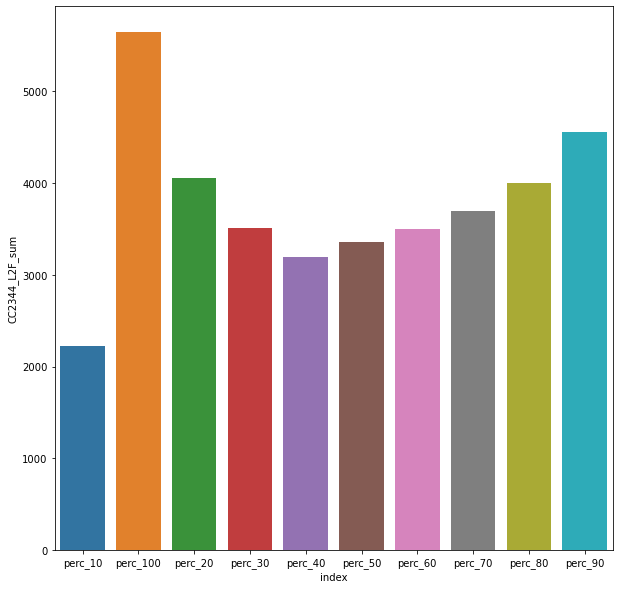

In [5]:
DEGs_per_bin = pd.DataFrame()
a = DEGs.loc[DEGs['sample'] == 'CC2344']
for i in a['perc_bins'].unique():  
    DEGs_per_bin.at[i, 'CC2344_count'] = len(a.loc[a['perc_bins'] == i])
    DEGs_per_bin.at[i, 'CC2344_L2F_sum'] = abs(a.loc[a['perc_bins'] == i]['L2F']).sum()
b = DEGs.loc[DEGs['sample'] == 'CC2931']
for i in b['perc_bins'].unique():  
    DEGs_per_bin.at[i, 'CC2931_count'] = len(b.loc[b['perc_bins'] == i])
    DEGs_per_bin.at[i, 'CC2931_L2F_sum'] = abs(b.loc[b['perc_bins'] == i]['L2F']).sum()
    
DEGs_per_bin = DEGs_per_bin.reset_index()
DEGs_per_bin.sort_values(by = ['index'], inplace = True)

plt.figure(figsize = (10,10))
sns.barplot(DEGs_per_bin, x = 'index', y = 'CC2344_L2F_sum')

### Plots 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

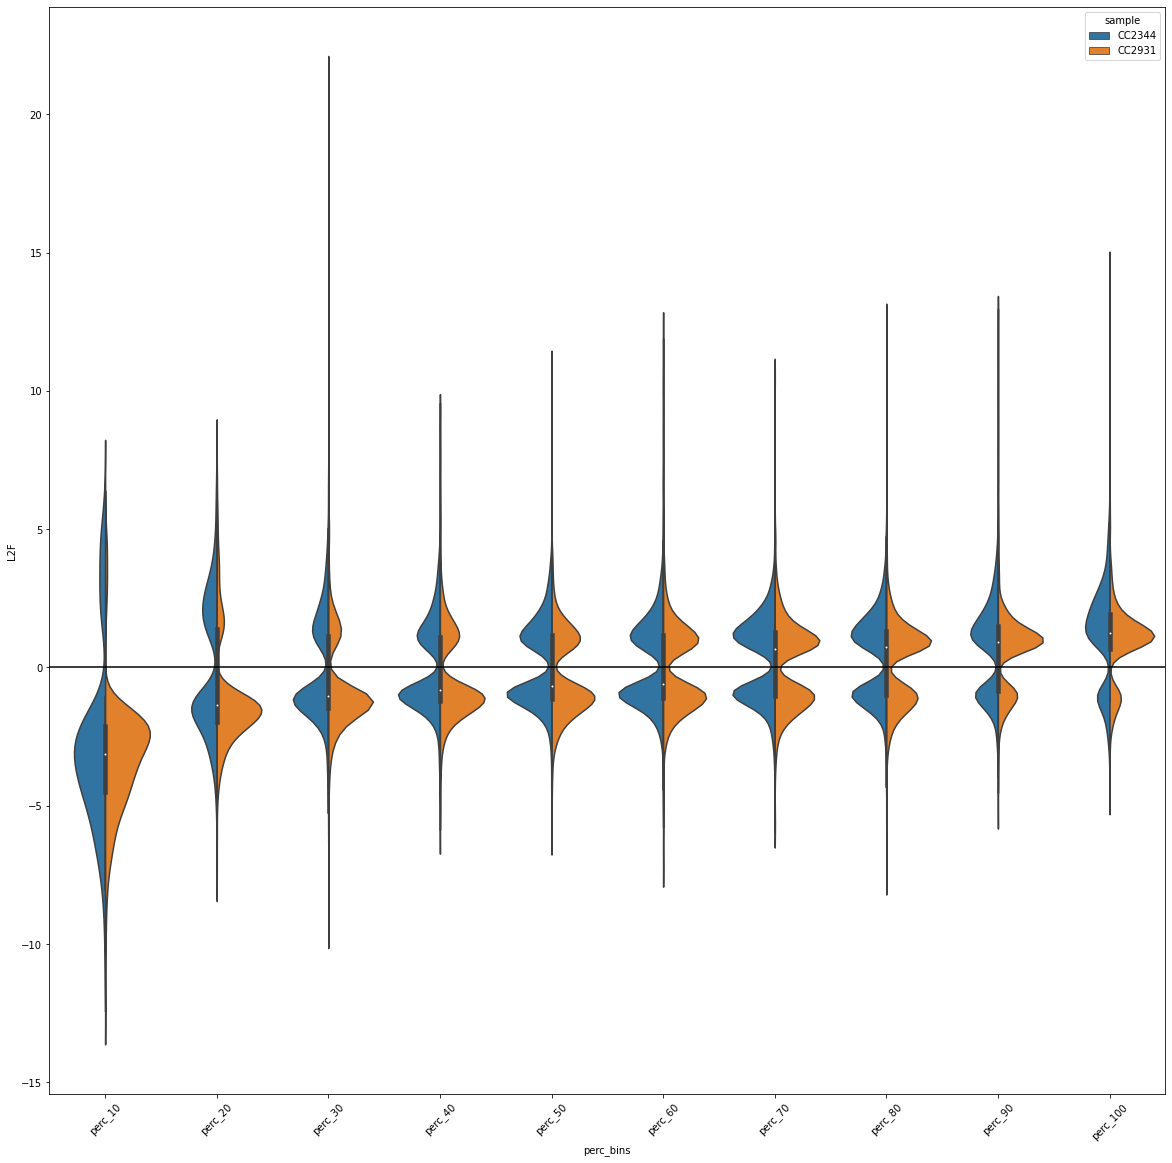

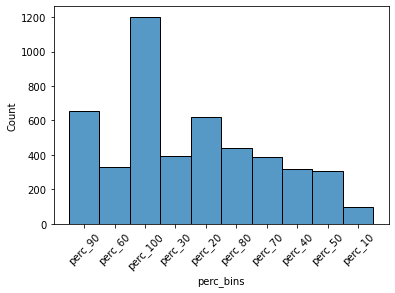

In [14]:
#### Relationship between percentile bins and log2 fold ####
plt.figure(figsize = (20, 20))
sns.violinplot(data = DEGs, x = 'perc_bins', y = 'L2F', hue = 'sample', split = True, order = ['perc_10', 'perc_20', 
                                                                                                   'perc_30', 'perc_40', 'perc_50', 'perc_60', 'perc_70', 'perc_80', 'perc_90', 'perc_100'])
plt.xticks(rotation = 45)
plt.axhline(0, color = 'black')
plt.figure()

#### Distribution of DEGs (L2F < 2) across percentile bins ####
above_fc2 = DEGs.loc[DEGs['L2F'] >= 2]
sns.histplot(data = above_fc2, x = 'perc_bins')
plt.xticks(rotation=45)

## Distribution across FPKM bins

### Log<sub>2</sub> fold change across FPKM percentile bins

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


,CC2344_pval,CC2344_P,CC2931_pval,CC2931_P
perc_10-perc_20,2.723355e-122,Reject,5.860475e-302,Reject
perc_20-perc_30,5.298026e-247,Reject,6.949989e-283,Reject
perc_30-perc_40,6.225843e-60,Reject,2.443963e-44,Reject
perc_40-perc_50,6.213739e-02,Fail to Reject,1.429113e-10,Reject
perc_50-perc_60,3.297882e-01,Fail to Reject,1.501429e-03,Reject
perc_60-perc_70,5.771386e-01,Fail to Reject,7.496459e-02,Fail to Reject
perc_70-perc_80,4.975291e-11,Reject,9.160274e-01,Fail to Reject
perc_80-perc_90,1.204149e-14,Reject,1.911371e-08,Reject
perc_90-perc_100,9.541028e-93,Reject,3.841889e-54,Reject


,CC2344_pval,CC2344_P,CC2931_pval,CC2931_P
perc_10-perc_20,0.000000e+00,Reject,0.000000,Reject
perc_20-perc_30,1.352039e-13,Reject,0.000000,Reject
perc_30-perc_40,2.373471e-04,Reject,0.000000,Reject
perc_40-perc_50,1.349087e-02,Reject,0.000004,Reject
perc_50-perc_60,5.644148e-01,Fail to Reject,0.000049,Reject
perc_60-perc_70,1.820601e-04,Reject,0.001144,Reject
perc_70-perc_80,9.120565e-01,Fail to Reject,0.086664,Fail to Reject
perc_80-perc_90,9.989745e-03,Reject,0.000000,Reject
perc_90-perc_100,0.000000e+00,Reject,0.000000,Reject


,CC2344_var,CC2931_var,CC2344_mean,CC2931_mean,CC2344_median,CC2931_median
perc_10,2.049185,2.105625,-0.254663,-0.457405,0.000000,-0.107100
perc_20,1.086916,0.948366,0.069162,-0.161597,0.033489,-0.152186
perc_30,0.632448,0.519900,0.003789,-0.103874,-0.000856,-0.088918
perc_40,0.474331,0.399204,0.025738,-0.041818,0.012037,-0.032383
perc_50,0.457174,0.361420,0.039824,-0.022095,0.018616,-0.005658
perc_60,0.479779,0.352024,0.045071,0.000435,0.019692,0.012972
perc_70,0.461905,0.358916,0.068693,0.019241,0.031902,0.026050
perc_80,0.523345,0.356417,0.075460,0.026911,0.027489,0.033155
perc_90,0.619570,0.372817,0.113489,0.087342,0.031390,0.072603
perc_100,0.864708,0.500592,0.200334,0.190530,0.076022,0.161216


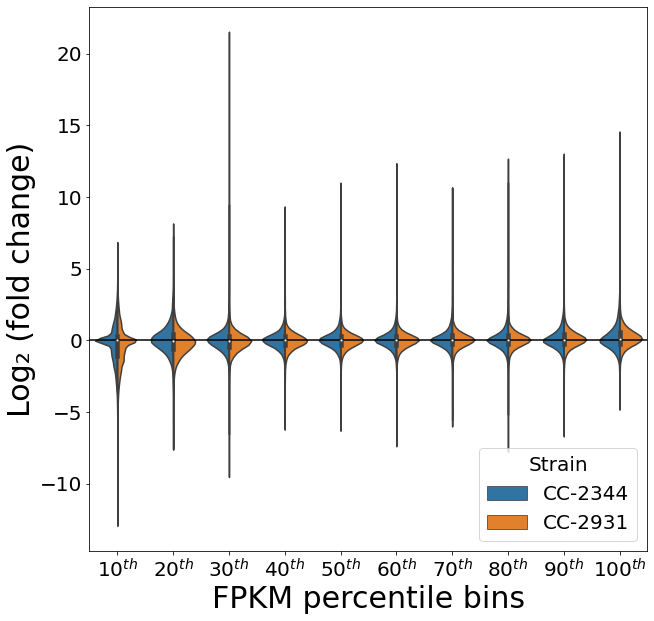

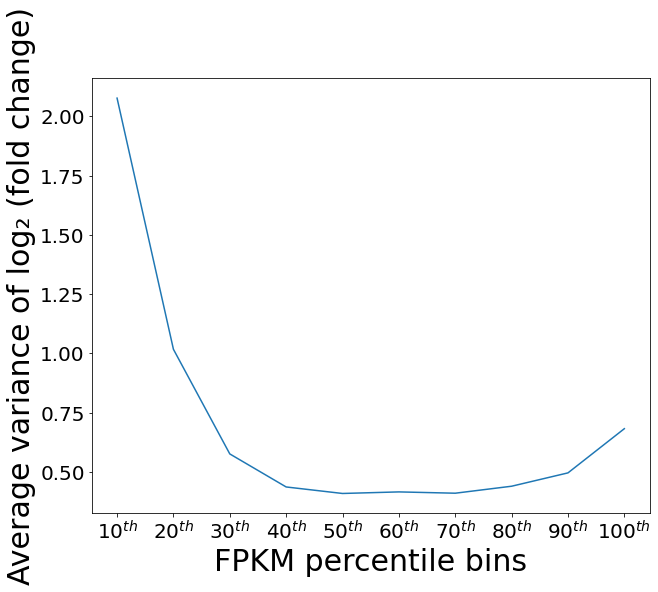

<Figure size 432x288 with 0 Axes>

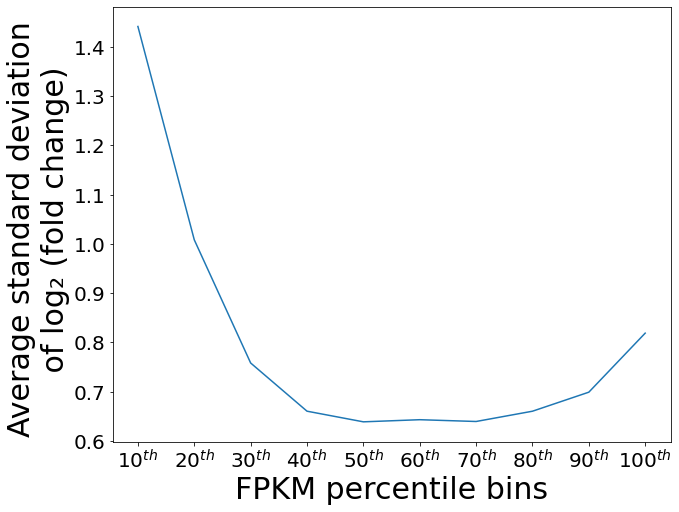

In [12]:
CC2344 = ['CC2344-ANC', "CC2344-L1", "CC2344-L2", "CC2344-L3", "CC2344-L4", "CC2344-L5", "CC2344-L6", "CC2344-L7", "CC2344-L8", "CC2344-L9", "CC2344-L10", "CC2344-L11", "CC2344-L12", "CC2344-L13", "CC2344-L14", "CC2344-L15"]
CC2931 = ["CC2931-ANC", "CC2931-L1", "CC2931-L2", "CC2931-L3", "CC2931-L4", "CC2931-L5", "CC2931-L6", "CC2931-L7", "CC2931-L9", "CC2931-L10", "CC2931-L11", "CC2931-L13", "CC2931-L14", "CC2931-L15"]

CC2931_avg_fpkm = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/fpkm/CC2931_avg_fpkm', delimiter = '\t')
CC2344_avg_fpkm = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/fpkm/CC2344_avg_fpkm', delimiter = '\t')

CC2344_log2fold = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/raw_counts/CC2344_log2Fold', delimiter = '\t', index_col = 'Unnamed: 0')
CC2931_log2fold = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/raw_counts/CC2931_log2Fold', delimiter = '\t', index_col = 'Unnamed: 0')

CC2344_L2F_dist = {}
CC2931_L2F_dist = {}

#### The log2 fold change of genes within FPKM percentile bin (excluding ancestors) ####
for i in CC2931_bins.keys():
    genes = CC2931_bins[i]
    CC2931_genes = CC2931_log2fold[CC2931[1:]].loc[genes].reset_index()
    CC2931_genes = pd.melt(CC2931_genes, id_vars = 'index', value_vars = CC2931_genes.columns[1:])
    CC2931_L2F_dist[i] = CC2931_genes['value'].values.tolist()

for i in CC2344_bins.keys():
    genes = CC2344_bins[i]
    CC2344_genes = CC2344_log2fold[CC2344[1:]].loc[genes].reset_index()
    CC2344_genes = pd.melt(CC2344_genes, id_vars = 'index', value_vars = CC2344_genes.columns[1:])
    CC2344_L2F_dist[i] = CC2344_genes['value'].values.tolist()
    
CC2344_L2F_dist = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in CC2344_L2F_dist.items()])).reset_index()
CC2931_L2F_dist = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in CC2931_L2F_dist.items()])).reset_index()

CC2344_L2F_dist = pd.melt(CC2344_L2F_dist, id_vars = ['index'], value_vars = CC2344_L2F_dist.columns[1:])
CC2344_L2F_dist['sample'] = 'CC-2344'
CC2931_L2F_dist = pd.melt(CC2931_L2F_dist, id_vars = ['index'], value_vars = CC2931_L2F_dist.columns[1:])
CC2931_L2F_dist['sample'] = 'CC-2931'

L2F_dist = pd.concat([CC2344_L2F_dist, CC2931_L2F_dist])
L2F_dist['variable'] = L2F_dist['variable'].replace({'perc_10':'$10^{th}$', 'perc_20':'$20^{th}$', 'perc_30':'$30^{th}$', 'perc_40':'$40^{th}$', 
                             'perc_50':'$50^{th}$', 'perc_60':'$60^{th}$', 'perc_70':'$70^{th}$', 'perc_80':'$80^{th}$', 'perc_90':'$90^{th}$', 'perc_100':'$100^{th}$'})

#### Plotting the distribution of log2 fold changes per FPKM percentile bins ####
fig, ax = plt.subplots(figsize = (10, 10))
a = sns.violinplot(ax = ax, data = L2F_dist, x = 'variable', y = 'value', hue = 'sample', alpha = 0.2, split = True)
plt.axhline(0, color = 'black')
plt.ylabel('Log\u2082 (fold change)', fontsize = 30)
plt.xlabel('FPKM percentile bins', fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(title = 'Strain', loc = 'lower right', fontsize = 20)
plt.setp(a.get_legend().get_title(), fontsize='20')
plt.savefig('/research/projects/chlamydomonas/MAexpression/analysis/log2fold/L2F_distribution_per_FPKM_percentile_bins.eps', format = 'eps', dpi = 600, bbox_inches = 'tight')
plt.savefig('/research/projects/chlamydomonas/MAexpression/analysis/log2fold/L2F_distribution_per_FPKM_percentile_bins.pdf', format = 'pdf', dpi = 600, bbox_inches = 'tight')

#### Variance and standard deviation of log2 fold expression changes per fpkm percentile bin ####
L2F_var = pd.DataFrame()
columns = L2F_dist['variable'].unique().tolist()
for i in columns:
    CC2344_L2F = L2F_dist.loc[L2F_dist['sample'] == 'CC-2344']
    CC2344_var = CC2344_L2F.loc[CC2344_L2F['variable'] == i]['value'].var()
    CC2344_std = CC2344_L2F.loc[CC2344_L2F['variable'] == i]['value'].std()
    CC2931_L2F = L2F_dist.loc[L2F_dist['sample'] == 'CC-2931']
    CC2931_var = CC2931_L2F.loc[CC2931_L2F['variable'] == i]['value'].var()
    CC2931_std = CC2931_L2F.loc[CC2931_L2F['variable'] == i]['value'].std()
    L2F_var.at[i, 'average_var'] = (CC2344_var + CC2931_var)/2
    L2F_var.at[i, 'average_std'] = (CC2344_std + CC2931_std)/2
L2F_var = L2F_var.reset_index()
plt.subplots(figsize = (10, 8))
sns.lineplot(data = L2F_var, x = 'index', y = 'average_var')
plt.ylabel('Average variance of log\u2082 (fold change)', fontsize = 30)
plt.xlabel('FPKM percentile bins', fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.savefig('/research/projects/chlamydomonas/MAexpression/analysis/log2fold/average_variance_per_fpkm.eps', format = 'eps', dpi = 600, bbox_inches = 'tight')
plt.savefig('/research/projects/chlamydomonas/MAexpression/analysis/log2fold/average_variance_per_fpkm.pdf', format = 'pdf', dpi = 600, bbox_inches = 'tight')

plt.figure()
plt.subplots(figsize = (10, 8))
sns.lineplot(data = L2F_var, x = 'index', y = 'average_std')
plt.ylabel('Average standard deviation \n of log\u2082 (fold change)', fontsize = 30)
plt.xlabel('FPKM percentile bins', fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.savefig('/research/projects/chlamydomonas/MAexpression/analysis/log2fold/average_std_per_fpkm.eps', format = 'eps', dpi = 600, bbox_inches = 'tight')
plt.savefig('/research/projects/chlamydomonas/MAexpression/analysis/log2fold/average_std_per_fpkm.pdf', format = 'pdf', dpi = 600, bbox_inches = 'tight')

#### Fligner-Killeen and Brunner Munzel stats ####
CC2344_block = CC2344_L2F_dist.loc[CC2344_L2F_dist['sample'] == 'CC-2344']
CC2931_block = CC2931_L2F_dist.loc[CC2931_L2F_dist['sample'] == 'CC-2931']

fligner_stats = pd.DataFrame()
brunner_munzel = pd.DataFrame()

fpkm_bins = list(CC2344_block['variable'].unique())
for i in range(len(fpkm_bins) - 1):
    ## CC-2344 ##
    a = CC2344_block.loc[CC2344_block['variable'] == fpkm_bins[i]]['value'].dropna().sort_values(ascending = True).values.tolist()
    b = CC2344_block.loc[CC2344_block['variable'] == fpkm_bins[i+1]]['value'].dropna().sort_values(ascending = True).values.tolist()
    ## Statistical tests ##
    fligner_stats.at[fpkm_bins[i] + '-' + fpkm_bins[i + 1], 'CC2344_pval'] = fligner(a, b)[1]
    brunner_munzel.at[fpkm_bins[i] + '-' + fpkm_bins[i + 1], 'CC2344_pval'] = scipy.stats.brunnermunzel(a, b)[1]
    
    if fligner(a, b)[1] < 0.05:
        fligner_stats.at[fpkm_bins[i] + '-' + fpkm_bins[i + 1], 'CC2344_P'] = 'Reject'
    else:
        fligner_stats.at[fpkm_bins[i] + '-' + fpkm_bins[i + 1], 'CC2344_P'] = 'Fail to Reject'
        
    if scipy.stats.brunnermunzel(a, b)[1] < 0.05:
        brunner_munzel.at[fpkm_bins[i] + '-' + fpkm_bins[i + 1], 'CC2344_P'] = 'Reject'
    else:
        brunner_munzel.at[fpkm_bins[i] + '-' + fpkm_bins[i + 1], 'CC2344_P'] = 'Fail to Reject'
        
    ## CC-2931 ##
    c = CC2931_block.loc[CC2931_block['variable'] == fpkm_bins[i]]['value'].dropna().sort_values(ascending = True).values.tolist()
    d = CC2931_block.loc[CC2931_block['variable'] == fpkm_bins[i+1]]['value'].dropna().sort_values(ascending = True).values.tolist()
    ## Statistical tests ##
    fligner_stats.at[fpkm_bins[i] + '-' + fpkm_bins[i + 1], 'CC2931_pval'] = fligner(c, d)[1]
    brunner_munzel.at[fpkm_bins[i] + '-' + fpkm_bins[i + 1], 'CC2931_pval'] = scipy.stats.brunnermunzel(c, d)[1]
    
    if fligner(c, d)[1] < 0.05:
        fligner_stats.at[fpkm_bins[i] + '-' + fpkm_bins[i + 1], 'CC2931_P'] = 'Reject'
    else:
        fligner_stats.at[fpkm_bins[i] + '-' + fpkm_bins[i + 1], 'CC2931_P'] = 'Fail to Reject'
        
    if scipy.stats.brunnermunzel(c, d)[1] < 0.05:
        brunner_munzel.at[fpkm_bins[i] + '-' + fpkm_bins[i + 1], 'CC2931_P'] = 'Reject'
    else:
        brunner_munzel.at[fpkm_bins[i] + '-' + fpkm_bins[i + 1], 'CC2931_P'] = 'Fail to Reject'
        
display(fligner_stats)
display(brunner_munzel)

#### Stats of the variance, mean and median of the distribution in each expression percentile bin ####
stats = pd.DataFrame()
for i in range(len(fpkm_bins)):
    stats.at[fpkm_bins[i], 'CC2344_var'] = CC2344_block.loc[CC2344_block['variable'] == fpkm_bins[i]]['value'].dropna().sort_values(ascending = True).var()
    stats.at[fpkm_bins[i], 'CC2931_var'] = CC2931_block.loc[CC2931_block['variable'] == fpkm_bins[i]]['value'].dropna().sort_values(ascending = True).var()
    stats.at[fpkm_bins[i], 'CC2344_mean'] = CC2344_block.loc[CC2344_block['variable'] == fpkm_bins[i]]['value'].dropna().sort_values(ascending = True).mean()
    stats.at[fpkm_bins[i], 'CC2931_mean'] = CC2931_block.loc[CC2931_block['variable'] == fpkm_bins[i]]['value'].dropna().sort_values(ascending = True).mean()
    stats.at[fpkm_bins[i], 'CC2344_median'] = CC2344_block.loc[CC2344_block['variable'] == fpkm_bins[i]]['value'].dropna().sort_values(ascending = True).median()
    stats.at[fpkm_bins[i], 'CC2931_median'] = CC2931_block.loc[CC2931_block['variable'] == fpkm_bins[i]]['value'].dropna().sort_values(ascending = True).median()
display(stats)

### Absolute log<sub>2</sub> fold change across FPKM percentile bins

,CC2344_pval,CC2344_P,CC2931_pval,CC2931_P
perc_10-perc_20,2.410434e-87,Reject,1.110816e-102,Reject
perc_20-perc_30,2.904254e-25,Reject,4.222792e-28,Reject
perc_30-perc_40,2.603915e-05,Reject,7.207927e-04,Reject
perc_40-perc_50,5.448438e-01,Fail to Reject,5.844567e-01,Fail to Reject
perc_50-perc_60,1.832911e-01,Fail to Reject,7.891026e-01,Fail to Reject
perc_60-perc_70,4.089020e-01,Fail to Reject,8.831293e-01,Fail to Reject
perc_70-perc_80,4.269261e-02,Reject,7.919588e-01,Fail to Reject
perc_80-perc_90,1.342655e-02,Reject,5.130105e-01,Fail to Reject
perc_90-perc_100,1.567579e-10,Reject,2.213211e-07,Reject


,CC2344_pval,CC2344_P,CC2931_pval,CC2931_P
perc_10-perc_20,1.214972e-17,Reject,2.303870e-28,Reject
perc_20-perc_30,1.090014e-50,Reject,1.593016e-74,Reject
perc_30-perc_40,2.404492e-19,Reject,1.535187e-13,Reject
perc_40-perc_50,2.223363e-01,Fail to Reject,1.912231e-04,Reject
perc_50-perc_60,5.602552e-01,Fail to Reject,6.056939e-02,Fail to Reject
perc_60-perc_70,9.717752e-01,Fail to Reject,1.677887e-01,Fail to Reject
perc_70-perc_80,4.208729e-03,Reject,7.560940e-01,Fail to Reject
perc_80-perc_90,2.912443e-03,Reject,7.110650e-04,Reject
perc_90-perc_100,0.000000e+00,Reject,0.000000e+00,Reject


,CC2344_var,CC2931_var,CC2344_mean,CC2931_mean,CC2344_median,CC2931_median
perc_10,0.522738,0.624996,0.821109,0.890907,0.768609,0.782564
perc_20,0.155635,0.164655,0.618306,0.627825,0.505435,0.516995
perc_30,0.104848,0.069172,0.469354,0.442999,0.385586,0.377529
perc_40,0.085212,0.064072,0.402328,0.394390,0.325565,0.324572
perc_50,0.073662,0.052455,0.393209,0.369372,0.319726,0.311408
perc_60,0.079391,0.055563,0.393853,0.360149,0.316979,0.298217
perc_70,0.078581,0.058994,0.396509,0.369444,0.316579,0.307380
perc_80,0.103399,0.048967,0.426030,0.366267,0.335350,0.308215
perc_90,0.128789,0.053473,0.462034,0.386178,0.356401,0.327041
perc_100,0.166964,0.078437,0.556589,0.457596,0.439925,0.383456


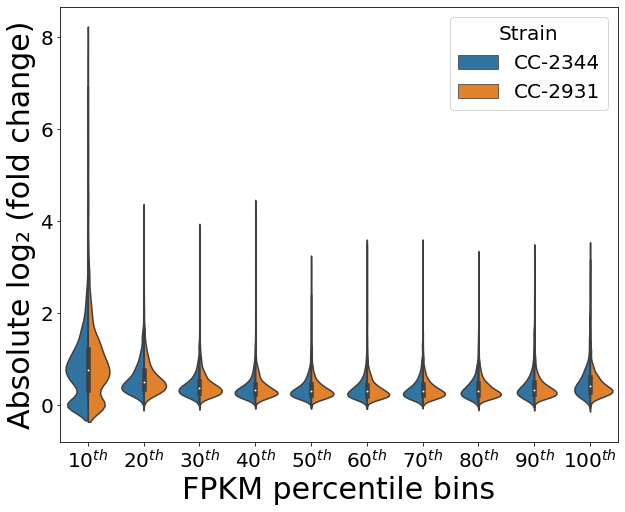

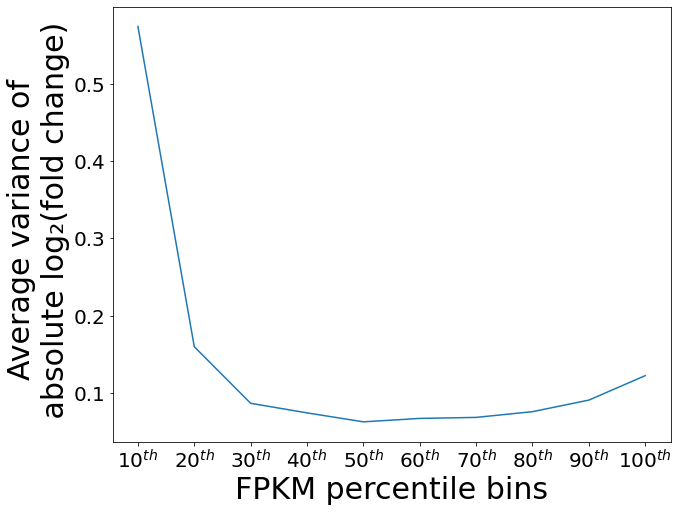

<Figure size 432x288 with 0 Axes>

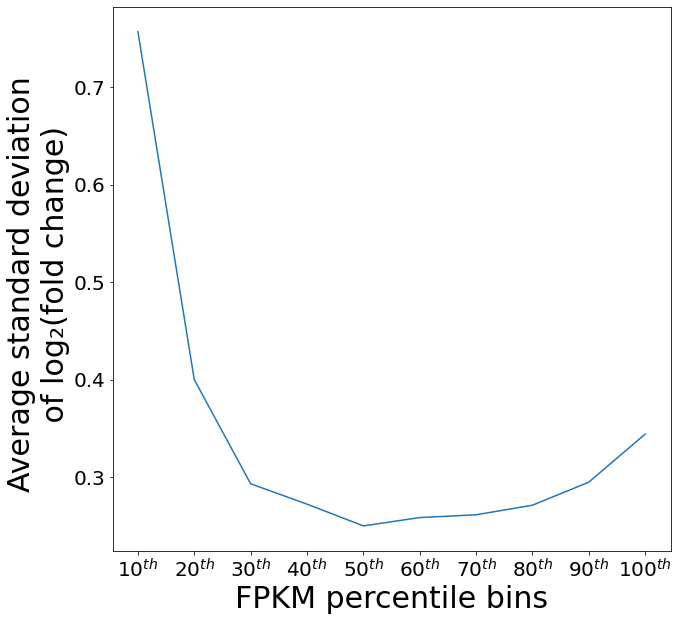

In [10]:
CC2344 = ['CC2344-ANC', "CC2344-L1", "CC2344-L2", "CC2344-L3", "CC2344-L4", "CC2344-L5", "CC2344-L6", "CC2344-L7", "CC2344-L8", "CC2344-L9", "CC2344-L10", "CC2344-L11", "CC2344-L12", "CC2344-L13", "CC2344-L14", "CC2344-L15"]
CC2931 = ["CC2931-ANC", "CC2931-L1", "CC2931-L2", "CC2931-L3", "CC2931-L4", "CC2931-L5", "CC2931-L6", "CC2931-L7", "CC2931-L9", "CC2931-L10", "CC2931-L11", "CC2931-L13", "CC2931-L14", "CC2931-L15"]

CC2931_avg_fpkm = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/fpkm/CC2931_avg_fpkm', delimiter = '\t')
CC2344_avg_fpkm = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/fpkm/CC2344_avg_fpkm', delimiter = '\t')

CC2344_log2fold = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/raw_counts/CC2344_log2Fold', delimiter = '\t', index_col = 'Unnamed: 0')
CC2931_log2fold = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/raw_counts/CC2931_log2Fold', delimiter = '\t', index_col = 'Unnamed: 0')

CC2344_L2F_dist = {}
CC2931_L2F_dist = {}

#### The absolute log2 fold change of genes within FPKM percentile bin (excluding ancestors) ####
for i in CC2931_bins.keys():
    genes = CC2931_bins[i]
    CC2931_genes = abs(CC2931_log2fold[CC2931[1:]].loc[genes])
    CC2931_genes['average_abs_l2f'] = CC2931_genes[CC2931[1:]].loc[genes].median(axis = 1)
    CC2931_genes = CC2931_genes.reset_index()
    CC2931_genes = pd.melt(CC2931_genes, id_vars = 'index', value_vars = 'average_abs_l2f')
    CC2931_L2F_dist[i] = CC2931_genes['value'].values.tolist()
    
for i in CC2344_bins.keys():
    genes = CC2344_bins[i]
    CC2344_genes = abs(CC2344_log2fold[CC2344[1:]].loc[genes])
    CC2344_genes['average_abs_l2f'] = CC2344_genes[CC2344[1:]].loc[genes].median(axis = 1)
    CC2344_genes = CC2344_genes.reset_index()
    CC2344_genes = pd.melt(CC2344_genes, id_vars = 'index', value_vars = 'average_abs_l2f')
    CC2344_L2F_dist[i] = CC2344_genes['value'].values.tolist()
    
CC2344_L2F_dist = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in CC2344_L2F_dist.items()])).reset_index()
CC2931_L2F_dist = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in CC2931_L2F_dist.items()])).reset_index()

CC2344_L2F_dist = pd.melt(CC2344_L2F_dist, id_vars = ['index'], value_vars = CC2344_L2F_dist.columns[1:])
CC2344_L2F_dist['sample'] = 'CC-2344'
CC2931_L2F_dist = pd.melt(CC2931_L2F_dist, id_vars = ['index'], value_vars = CC2931_L2F_dist.columns[1:])
CC2931_L2F_dist['sample'] = 'CC-2931'

L2F_dist = pd.concat([CC2344_L2F_dist, CC2931_L2F_dist])
L2F_dist['variable'] = L2F_dist['variable'].replace({'perc_10':'$10^{th}$', 'perc_20':'$20^{th}$', 'perc_30':'$30^{th}$', 'perc_40':'$40^{th}$', 
                             'perc_50':'$50^{th}$', 'perc_60':'$60^{th}$', 'perc_70':'$70^{th}$', 'perc_80':'$80^{th}$', 'perc_90':'$90^{th}$', 'perc_100':'$100^{th}$'})

#### Plotting the distribution of absolute log2 fold changes per FPKM percentile bins ####
fig, ax = plt.subplots(figsize = (10, 8))
a = sns.violinplot(ax = ax, data = L2F_dist, x = 'variable', y = 'value', hue = 'sample', alpha = 0.2, split = True)
plt.ylabel('Absolute log\u2082 (fold change)', fontsize = 30)
plt.xlabel('FPKM percentile bins', fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(title = 'Strain', loc = 'upper right', fontsize = 20)
plt.setp(a.get_legend().get_title(), fontsize='20')
plt.savefig('/research/projects/chlamydomonas/MAexpression/analysis/fpkm/absolute_l2f.pdf', dpi = 600, bbox_inches = 'tight')

#### Variance and standard deviation of log2 fold expression changes per FPKM percentile bin ####
L2F_var = pd.DataFrame()
columns = L2F_dist['variable'].unique().tolist()
for i in columns:
    CC2344_L2F = L2F_dist.loc[L2F_dist['sample'] == 'CC-2344']
    CC2344_var = CC2344_L2F.loc[CC2344_L2F['variable'] == i]['value'].var()
    CC2344_std = CC2344_L2F.loc[CC2344_L2F['variable'] == i]['value'].std()
    CC2931_L2F = L2F_dist.loc[L2F_dist['sample'] == 'CC-2931']
    CC2931_var = CC2931_L2F.loc[CC2931_L2F['variable'] == i]['value'].var()
    CC2931_std = CC2931_L2F.loc[CC2931_L2F['variable'] == i]['value'].std()
    L2F_var.at[i, 'average_var'] = (CC2344_var + CC2931_var)/2
    L2F_var.at[i, 'average_std'] = (CC2344_std + CC2931_std)/2
    
L2F_var = L2F_var.reset_index()
plt.subplots(figsize = (10, 8))
sns.lineplot(data = L2F_var, x = 'index', y = 'average_var')
plt.ylabel('Average variance of \n absolute log\u2082(fold change)', fontsize = 30)
plt.xlabel('FPKM percentile bins', fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.figure()
plt.subplots(figsize = (10, 10))
sns.lineplot(data = L2F_var, x = 'index', y = 'average_std')
plt.ylabel('Average standard deviation \n of log\u2082(fold change)', fontsize = 30)
plt.xlabel('FPKM percentile bins', fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

#### Fligner-Killeen and Brunner Munzel stats ####
CC2344_block = CC2344_L2F_dist.loc[CC2344_L2F_dist['sample'] == 'CC-2344']
CC2931_block = CC2931_L2F_dist.loc[CC2931_L2F_dist['sample'] == 'CC-2931']

fligner_stats = pd.DataFrame()
brunner_munzel = pd.DataFrame()

fpkm_bins = list(CC2344_block['variable'].unique())
for i in range(len(fpkm_bins) - 1):
    ## CC-2344 ##
    a = CC2344_block.loc[CC2344_block['variable'] == fpkm_bins[i]]['value'].dropna().sort_values(ascending = True).values.tolist()
    b = CC2344_block.loc[CC2344_block['variable'] == fpkm_bins[i+1]]['value'].dropna().sort_values(ascending = True).values.tolist()
    ## Statistical tests ##
    fligner_stats.at[fpkm_bins[i] + '-' + fpkm_bins[i + 1], 'CC2344_pval'] = fligner(a, b)[1]
    brunner_munzel.at[fpkm_bins[i] + '-' + fpkm_bins[i + 1], 'CC2344_pval'] = scipy.stats.brunnermunzel(a, b)[1]
    
    if fligner(a, b)[1] < 0.05:
        fligner_stats.at[fpkm_bins[i] + '-' + fpkm_bins[i + 1], 'CC2344_P'] = 'Reject'
    else:
        fligner_stats.at[fpkm_bins[i] + '-' + fpkm_bins[i + 1], 'CC2344_P'] = 'Fail to Reject'
        
    if scipy.stats.brunnermunzel(a, b)[1] < 0.05:
        brunner_munzel.at[fpkm_bins[i] + '-' + fpkm_bins[i + 1], 'CC2344_P'] = 'Reject'
    else:
        brunner_munzel.at[fpkm_bins[i] + '-' + fpkm_bins[i + 1], 'CC2344_P'] = 'Fail to Reject'
        
    ## CC-2931 ##
    c = CC2931_block.loc[CC2931_block['variable'] == fpkm_bins[i]]['value'].dropna().sort_values(ascending = True).values.tolist()
    d = CC2931_block.loc[CC2931_block['variable'] == fpkm_bins[i+1]]['value'].dropna().sort_values(ascending = True).values.tolist()
    ## Statistical tests ##
    fligner_stats.at[fpkm_bins[i] + '-' + fpkm_bins[i + 1], 'CC2931_pval'] = fligner(c, d)[1]
    brunner_munzel.at[fpkm_bins[i] + '-' + fpkm_bins[i + 1], 'CC2931_pval'] = scipy.stats.brunnermunzel(c, d)[1]
    if fligner(c, d)[1] < 0.05:
        fligner_stats.at[fpkm_bins[i] + '-' + fpkm_bins[i + 1], 'CC2931_P'] = 'Reject'
    else:
        fligner_stats.at[fpkm_bins[i] + '-' + fpkm_bins[i + 1], 'CC2931_P'] = 'Fail to Reject'
    if scipy.stats.brunnermunzel(c, d)[1] < 0.05:
        brunner_munzel.at[fpkm_bins[i] + '-' + fpkm_bins[i + 1], 'CC2931_P'] = 'Reject'
    else:
        brunner_munzel.at[fpkm_bins[i] + '-' + fpkm_bins[i + 1], 'CC2931_P'] = 'Fail to Reject'
        
display(fligner_stats)
display(brunner_munzel)

#### Stats of the variance, mean and median of the distribution in each expression percentile bin ####
stats = pd.DataFrame()
for i in range(len(fpkm_bins)):
    stats.at[fpkm_bins[i], 'CC2344_var'] = CC2344_block.loc[CC2344_block['variable'] == fpkm_bins[i]]['value'].dropna().sort_values(ascending = True).var()
    stats.at[fpkm_bins[i], 'CC2931_var'] = CC2931_block.loc[CC2931_block['variable'] == fpkm_bins[i]]['value'].dropna().sort_values(ascending = True).var()
    stats.at[fpkm_bins[i], 'CC2344_mean'] = CC2344_block.loc[CC2344_block['variable'] == fpkm_bins[i]]['value'].dropna().sort_values(ascending = True).mean()
    stats.at[fpkm_bins[i], 'CC2931_mean'] = CC2931_block.loc[CC2931_block['variable'] == fpkm_bins[i]]['value'].dropna().sort_values(ascending = True).mean()
    stats.at[fpkm_bins[i], 'CC2344_median'] = CC2344_block.loc[CC2344_block['variable'] == fpkm_bins[i]]['value'].dropna().sort_values(ascending = True).median()
    stats.at[fpkm_bins[i], 'CC2931_median'] = CC2931_block.loc[CC2931_block['variable'] == fpkm_bins[i]]['value'].dropna().sort_values(ascending = True).median()
display(stats)

In [13]:
display(len(L2F_dist.loc[L2F_dist['variable'] == '$10^{th}$']))
display(len(L2F_dist.loc[L2F_dist['variable'] == '$100^{th}$']))

3482

3482

### Sum of absolute value log<sub>2</sub> fold change among FPKM bins

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


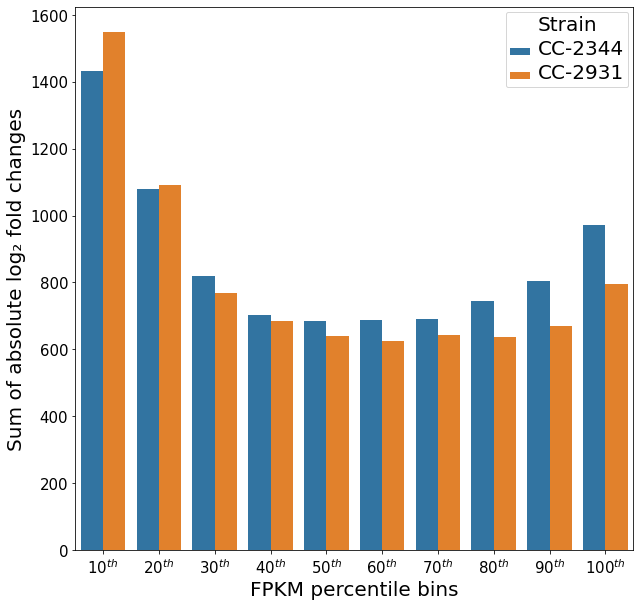

In [22]:
CC2344 = ['CC2344-ANC', "CC2344-L1", "CC2344-L2", "CC2344-L3", "CC2344-L4", "CC2344-L5", "CC2344-L6", "CC2344-L7", "CC2344-L8", "CC2344-L9", "CC2344-L10", "CC2344-L11", "CC2344-L12", "CC2344-L13", "CC2344-L14", "CC2344-L15"]
CC2931 = ["CC2931-ANC", "CC2931-L1", "CC2931-L2", "CC2931-L3", "CC2931-L4", "CC2931-L5", "CC2931-L6", "CC2931-L7", "CC2931-L9", "CC2931-L10", "CC2931-L11", "CC2931-L13", "CC2931-L14", "CC2931-L15"]

for i in ['CC2931_log2fold', 'CC2344_log2fold', 'CC2344_fpkm_bins', 'CC2931_fpkm_bins']:
    exec('{} = pd.DataFrame()'.format(i))

CC2931_avg_fpkm = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/fpkm/CC2931_avg_fpkm', delimiter = '\t')
CC2344_avg_fpkm = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/fpkm/CC2344_avg_fpkm', delimiter = '\t')

CC2344_L2F = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/raw_counts/CC2344_log2Fold', delimiter = '\t', index_col = 'Unnamed: 0').drop(columns = ['CC2344-ANC'])
CC2931_L2F = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/raw_counts/CC2931_log2Fold', delimiter = '\t', index_col = 'Unnamed: 0').drop(columns = ['CC2931-ANC'])

#### Maximum genes per bin ####
max_CC2344_genes = []
for perc in CC2344_bins.keys(): max_CC2344_genes.append(len(CC2344_bins[perc]))
max_CC2344_genes = max(max_CC2344_genes)

max_CC2931_genes = []
for perc in CC2931_bins.keys(): max_CC2931_genes.append(len(CC2931_bins[perc]))
max_CC2931_genes = max(max_CC2931_genes)

#### Taking the absolute value of log2 fold ####
CC2931_L2F = CC2931_L2F.abs()
CC2344_L2F = CC2344_L2F.abs()

#### Determining the log2 fold sum of genes within each fpkm percentile (excluding ancestor) ####
for i in CC2931_bins.keys():
    genes = CC2931_bins[i]
    CC2931_genes = abs(CC2931_L2F[CC2931[1:]].loc[genes])
    CC2931_genes['average_abs_l2f'] = CC2931_genes[CC2931[1:]].loc[genes].median(axis = 1)
    CC2931_genes = CC2931_genes.reset_index()
    CC2931_genes = pd.melt(CC2931_genes, id_vars = 'index', value_vars = 'average_abs_l2f')
    CC2931_fpkm_bins.at[i, 'l2f_sum'] = CC2931_genes['value'].sum()
    CC2931_fpkm_bins.at[i, 'number_of_genes'] = len(CC2931_bins[i])
    
for i in CC2344_bins.keys():
    genes = CC2344_bins[i]
    CC2344_genes = abs(CC2344_L2F[CC2344[1:]].loc[genes])
    CC2344_genes['average_abs_l2f'] = CC2344_genes[CC2344[1:]].loc[genes].median(axis = 1)
    CC2344_genes = CC2344_genes.reset_index()
    CC2344_genes = pd.melt(CC2344_genes, id_vars = 'index', value_vars = 'average_abs_l2f')
    CC2344_L2F_dist[i] = CC2344_genes['value'].sum()
    CC2344_fpkm_bins.at[i, 'l2f_sum'] = CC2344_genes['value'].sum()
    CC2344_fpkm_bins.at[i, 'number_of_genes'] = len(CC2344_bins[i])

# for i in CC2931_bins.keys():
#     genes = CC2931_bins[i]
#     CC2931_sum = CC2931_L2F[CC2931[1:]].loc[genes].sum(axis = 1)
#     CC2931_fpkm_bins.at[i, 'l2f_sum'] = CC2931_sum.sum()
#     CC2931_fpkm_bins.at[i, 'number_of_genes'] = len(CC2931_bins[i])
# for i in CC2344_bins.keys():
#     genes = CC2344_bins[i]
#     CC2344_sum = CC2344_L2F[CC2344[1:]].loc[genes].sum(axis = 1)
#     CC2344_fpkm_bins.at[i, 'l2f_sum'] = CC2344_sum.sum()
#     CC2344_fpkm_bins.at[i, 'number_of_genes'] = len(CC2344_bins[i])
    
#### Plotting the sum of log2 fold changes per fpkm percentile bin ####
CC2344_fpkm_bins = CC2344_fpkm_bins.reset_index()
CC2931_fpkm_bins = CC2931_fpkm_bins.reset_index()
CC2344_fpkm_bins['Strain'] = 'CC-2344'
CC2931_fpkm_bins['Strain'] = 'CC-2931'
abs_l2f_sum = pd.concat([CC2344_fpkm_bins, CC2931_fpkm_bins], axis = 0)
abs_l2f_sum['index'] = abs_l2f_sum['index'].replace({'perc_10':'$10^{th}$', 'perc_20':'$20^{th}$', 'perc_30':'$30^{th}$', 'perc_40':'$40^{th}$', 
                                 'perc_50':'$50^{th}$', 'perc_60':'$60^{th}$', 'perc_70':'$70^{th}$', 'perc_80':'$80^{th}$', 'perc_90':'$90^{th}$', 'perc_100':'$100^{th}$'})

plt.figure(figsize = (10,10))
a = sns.barplot(data = abs_l2f_sum, x = 'index', y = 'l2f_sum', hue = 'Strain')
plt.xlabel('FPKM percentile bins', fontsize = 20)
plt.ylabel('Sum of absolute log\u2082 fold changes', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.setp(a.get_legend().get_texts(), fontsize='20') 
plt.setp(a.get_legend().get_title(), fontsize='20') 

plt.savefig('/research/projects/chlamydomonas/MAexpression/analysis/log2fold/sum_of_absval_log2fold_per_FPKM_percentile_bins.pdf', format = 'pdf', dpi = 150, bbox_inches = 'tight')
plt.savefig('/research/projects/chlamydomonas/MAexpression/analysis/log2fold/sum_of_absval_log2fold_per_FPKM_percentile_bins.eps', format = 'eps', dpi = 150, bbox_inches = 'tight')

### Mutational variance across FPKM percentile bins

,BM_pval
perc_10,4.430544e-01
perc_20,3.553336e-03
perc_30,1.624315e-47
perc_40,1.514708e-104
perc_50,1.209329e-114
perc_60,6.289606e-155
perc_70,2.088745e-134
perc_80,1.907522e-154
perc_90,1.038629e-197
perc_100,1.756008e-189


,CC2344_pval,CC2344_P,CC2931_pval,CC2931_P
perc_10-perc_20,0.000000e+00,Reject,0.000000,Reject
perc_20-perc_30,1.071714e-09,Reject,0.999541,Reject
perc_30-perc_40,9.440932e-01,Fail to Reject,1.000000,Reject
perc_40-perc_50,9.774431e-01,Reject,0.999763,Reject
perc_50-perc_60,5.023858e-01,Fail to Reject,1.000000,Reject
perc_60-perc_70,9.999703e-01,Reject,0.999668,Reject
perc_70-perc_80,5.822664e-01,Fail to Reject,0.994310,Reject
perc_80-perc_90,7.680261e-01,Fail to Reject,0.999995,Reject
perc_90-perc_100,4.573594e-01,Fail to Reject,0.849928,Fail to Reject


,CC2344_pval,CC2344_P,CC2931_pval,CC2931_P
perc_10-perc_20,4.721357e-01,Fail to Reject,1.263111e-05,Reject
perc_20-perc_30,1.384368e-15,Reject,2.953461e-22,Reject
perc_30-perc_40,2.408478e-04,Reject,6.115068e-12,Reject
perc_40-perc_50,4.825750e-01,Fail to Reject,3.239600e-02,Reject
perc_50-perc_60,3.339419e-01,Fail to Reject,9.906001e-01,Fail to Reject
perc_60-perc_70,8.981441e-01,Fail to Reject,3.796615e-01,Fail to Reject
perc_70-perc_80,8.199333e-01,Fail to Reject,6.341570e-01,Fail to Reject
perc_80-perc_90,2.241827e-01,Fail to Reject,7.768650e-01,Fail to Reject
perc_90-perc_100,4.025311e-01,Fail to Reject,3.065315e-01,Fail to Reject


,CC2344_var,CC2931_var,CC2344_mean,CC2931_mean,CC2344_median,CC2931_median
perc_10,1.603038e-06,1.376585e-06,0.000965,0.000881,0.000572,0.000535
perc_20,1.124783e-06,6.861205e-07,0.001779,0.001636,0.001659,0.001588
perc_30,6.893801e-07,4.001252e-07,0.001892,0.001559,0.001835,0.001503
perc_40,5.162949e-07,2.848964e-07,0.001839,0.001417,0.001791,0.001352
perc_50,5.360674e-07,2.806555e-07,0.001801,0.001371,0.001743,0.001312
perc_60,6.030911e-07,3.101802e-07,0.001812,0.001302,0.001754,0.001223
perc_70,5.734526e-07,2.400322e-07,0.001730,0.001246,0.001657,0.001169
perc_80,6.209830e-07,3.408270e-07,0.001722,0.001226,0.001629,0.001129
perc_90,6.089657e-07,2.795530e-07,0.001706,0.001162,0.001617,0.001072
perc_100,6.496465e-07,3.890363e-07,0.001712,0.001176,0.001620,0.001055


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


,BM_pval
perc_10,8.400794e-12
perc_20,0.000000e+00
perc_30,0.000000e+00
perc_40,0.000000e+00
perc_50,0.000000e+00
perc_60,0.000000e+00
perc_70,0.000000e+00
perc_80,0.000000e+00
perc_90,0.000000e+00
perc_100,0.000000e+00


,CC2344_pval,CC2344_P,CC2931_pval,CC2931_P
perc_10-perc_20,0.000000e+00,Reject,0.000000e+00,Reject
perc_20-perc_30,0.000000e+00,Reject,0.000000e+00,Reject
perc_30-perc_40,0.000000e+00,Reject,0.000000e+00,Reject
perc_40-perc_50,0.000000e+00,Reject,0.000000e+00,Reject
perc_50-perc_60,0.000000e+00,Reject,3.330669e-16,Reject
perc_60-perc_70,2.082556e-12,Reject,8.881784e-16,Reject
perc_70-perc_80,0.000000e+00,Reject,0.000000e+00,Reject
perc_80-perc_90,0.000000e+00,Reject,0.000000e+00,Reject
perc_90-perc_100,0.000000e+00,Reject,0.000000e+00,Reject


,CC2344_pval,CC2344_P,CC2931_pval,CC2931_P
perc_10-perc_20,8.502399e-82,Reject,3.474627e-16,Reject
perc_20-perc_30,3.881229e-02,Reject,7.749413e-06,Reject
perc_30-perc_40,2.492622e-01,Fail to Reject,4.988743e-01,Fail to Reject
perc_40-perc_50,7.789178e-01,Fail to Reject,3.126577e-01,Fail to Reject
perc_50-perc_60,7.109206e-01,Fail to Reject,9.929455e-02,Fail to Reject
perc_60-perc_70,2.049068e-02,Reject,9.087414e-04,Reject
perc_70-perc_80,5.092657e-03,Reject,2.430428e-02,Reject
perc_80-perc_90,2.222016e-04,Reject,2.496035e-07,Reject
perc_90-perc_100,2.521482e-39,Reject,5.759881e-62,Reject


,CC2344_var,CC2931_var,CC2344_mean,CC2931_mean,CC2344_median,CC2931_median
perc_10,0.002946,0.000303,0.036835,0.012554,0.012685,0.006897
perc_20,0.006202,0.000262,0.152482,0.035258,0.153141,0.035309
perc_30,0.005875,0.000220,0.231803,0.045049,0.232264,0.044520
perc_40,0.005686,0.000224,0.270521,0.049781,0.273385,0.048562
perc_50,0.005738,0.000241,0.295217,0.054221,0.297003,0.053515
perc_60,0.006064,0.000263,0.319396,0.058490,0.321021,0.057664
perc_70,0.006498,0.000305,0.338213,0.062776,0.339364,0.062350
perc_80,0.007384,0.000365,0.368632,0.070518,0.371655,0.069506
perc_90,0.009152,0.000461,0.410689,0.081331,0.416818,0.080674
perc_100,0.027129,0.001756,0.542895,0.115802,0.526451,0.109336


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


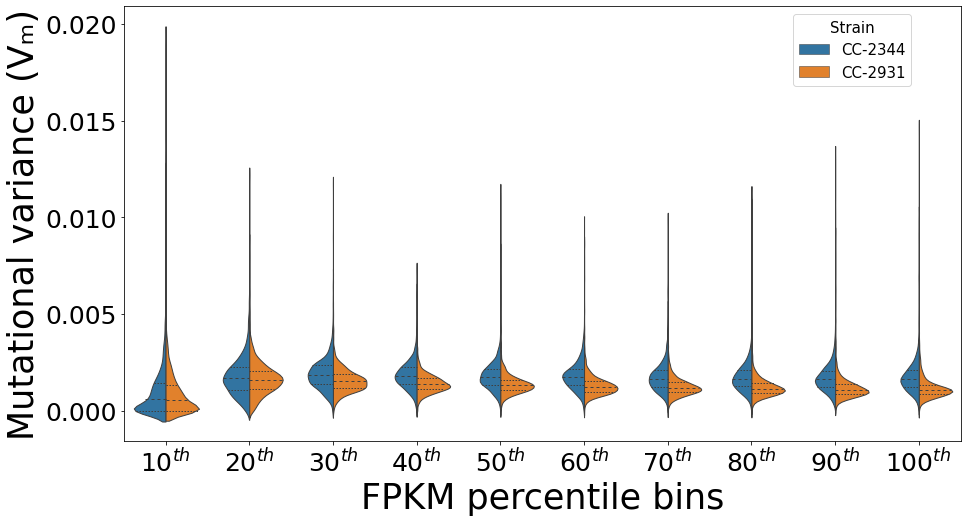

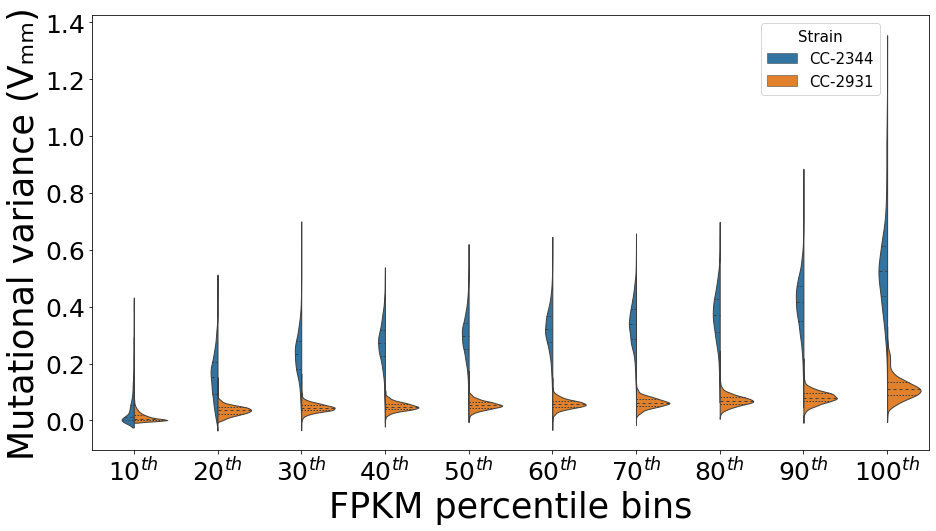

In [27]:
#### Mutational variance across FPKM percentile bins ####
#########################################################
CC2344 = ['CC2344-ANC', "CC2344-L1", "CC2344-L2", "CC2344-L3", "CC2344-L4", "CC2344-L5", "CC2344-L6", "CC2344-L7", "CC2344-L8", "CC2344-L9", "CC2344-L10", "CC2344-L11", "CC2344-L12", "CC2344-L13", "CC2344-L14", "CC2344-L15"]
CC2931 = ["CC2931-ANC", "CC2931-L1", "CC2931-L2", "CC2931-L3", "CC2931-L4", "CC2931-L5", "CC2931-L6", "CC2931-L7", "CC2931-L9", "CC2931-L10", "CC2931-L11", "CC2931-L13", "CC2931-L14", "CC2931-L15"]

CC2344_bins_df = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/fpkm/CC2344_bins', delimiter = '\t', index_col = 'Unnamed: 0')
CC2931_bins_df = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/fpkm/CC2931_bins', delimiter = '\t', index_col = 'Unnamed: 0')

CC2931_Vm = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/Vm/CC2931_Vm_noANC.txt', delimiter = '\t')
CC2344_Vm = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/Vm/CC2344_Vm_noANC.txt', delimiter = '\t')
CC2344_Vm = (np.log2(2)/np.log(2))*2*CC2344_Vm ### Log2 transformed and multiply by 2 according to a similar derivation of Lynch and Walsh's mutational variance
CC2931_Vm = (np.log2(2)/np.log(2))*2*CC2931_Vm 

CC2931_avg_fpkm = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/fpkm/CC2931_avg_fpkm', delimiter = '\t')
CC2344_avg_fpkm = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/fpkm/CC2344_avg_fpkm', delimiter = '\t')

titles = {'Vm_gen_noint':'Mutational variance (V\u2098)','Vm_mut_noint_nomutator':'Mutational variance (V\u2098\u2098)'}

for vm_option in ['Vm_gen_noint','Vm_mut_noint_nomutator']:
    CC2344_Vm_dist = {}
    CC2931_Vm_dist = {}
    #### Mutational variance of genes within each fpkm percentile bin (Excluding ancestor) ####
    for i in CC2931_bins_df.columns.tolist():
        genes = CC2931_bins_df[i]
        genes = list(set(CC2931_Vm.index.values).intersection(set(genes)))
        CC2931_Vm_dist[i] = CC2931_Vm.loc[genes][vm_option].values.tolist()

    for i in CC2344_bins_df.columns.tolist():
        genes = CC2344_bins_df[i]
        genes = list(set(CC2344_Vm.index.values).intersection(set(genes)))
        CC2344_Vm_dist[i] = CC2344_Vm.loc[genes][vm_option].values.tolist()

    CC2344_Vm_dist = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in CC2344_Vm_dist.items()])).reset_index()
    CC2931_Vm_dist = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in CC2931_Vm_dist.items()])).reset_index()

    #### Adding name of sample to each row ####
    CC2931_Vm_dist = pd.melt(CC2931_Vm_dist, id_vars = ['index'], value_vars = CC2931_Vm_dist.columns[1:])
    CC2931_Vm_dist['sample'] = 'CC-2931'
    CC2344_Vm_dist = pd.melt(CC2344_Vm_dist, id_vars = ['index'], value_vars = CC2344_Vm_dist.columns[1:])
    CC2344_Vm_dist['sample'] = 'CC-2344'

    #### Comparing distribution in mutational variance between strains in each FPKM-percentile bin ####
    Vm_between_strains = pd.DataFrame()
    for i in CC2344_bins_df.columns.tolist():
        #### Isolating the mutational variance in a given percentile bin ####
        CC2344_bin = CC2344_Vm_dist.loc[CC2344_Vm_dist['variable'] == i]
        CC2931_bin = CC2931_Vm_dist.loc[CC2931_Vm_dist['variable'] == i]
        Vm_between_strains.at[i, 'BM_pval'] = brunnermunzel(CC2344_bin['value'].dropna(), CC2931_bin['value'].dropna(), alternative = 'greater')[1]
    display(Vm_between_strains)
    
    #### Testing differences in the distributions of adjacent FPKM percentile bins ####
    brunner_munzel = pd.DataFrame()
    for i in range(len(fpkm_bins) - 1):
        a = CC2344_Vm_dist.loc[CC2344_Vm_dist['variable'] == fpkm_bins[i]]['value'].dropna().sort_values(ascending = True).values.tolist()
        b = CC2344_Vm_dist.loc[CC2344_Vm_dist['variable'] == fpkm_bins[i+1]]['value'].dropna().sort_values(ascending = True).values.tolist()
        brunner_munzel.at[fpkm_bins[i] + '-' + fpkm_bins[i + 1], 'CC2344_pval'] = brunnermunzel(a, b, alternative = 'less')[1]
        if brunnermunzel(a, b)[1] < 0.05:
            brunner_munzel.at[fpkm_bins[i] + '-' + fpkm_bins[i + 1], 'CC2344_P'] = 'Reject'
        else:
            brunner_munzel.at[fpkm_bins[i] + '-' + fpkm_bins[i + 1], 'CC2344_P'] = 'Fail to Reject'

        c = CC2931_Vm_dist.loc[CC2931_Vm_dist['variable'] == fpkm_bins[i]]['value'].dropna().sort_values(ascending = True).values.tolist()
        d = CC2931_Vm_dist.loc[CC2931_Vm_dist['variable'] == fpkm_bins[i+1]]['value'].dropna().sort_values(ascending = True).values.tolist()
        brunner_munzel.at[fpkm_bins[i] + '-' + fpkm_bins[i + 1], 'CC2931_pval'] = brunnermunzel(c, d, alternative = 'less')[1]
        if brunnermunzel(c, d)[1] < 0.05:
            brunner_munzel.at[fpkm_bins[i] + '-' + fpkm_bins[i + 1], 'CC2931_P'] = 'Reject'
        else:
            brunner_munzel.at[fpkm_bins[i] + '-' + fpkm_bins[i + 1], 'CC2931_P'] = 'Fail to Reject'
    display(brunner_munzel)

    #### Combining two dataframe containing data on mutational variance ####
    Vm_dist = pd.concat([CC2344_Vm_dist, CC2931_Vm_dist]).dropna()
    fpkm_bins = CC2344_bins_df.columns.tolist()

    #### Testing the homogeniety of variance across fpkm percentile bins ####
    fligner_stats = pd.DataFrame()
    for i in range(len(fpkm_bins) - 1):
        a = CC2344_Vm_dist.loc[CC2344_Vm_dist['variable'] == fpkm_bins[i]]['value'].dropna().sort_values(ascending = True).values.tolist()
        b = CC2344_Vm_dist.loc[CC2344_Vm_dist['variable'] == fpkm_bins[i+1]]['value'].dropna().sort_values(ascending = True).values.tolist()
        fligner_stats.at[fpkm_bins[i] + '-' + fpkm_bins[i + 1], 'CC2344_pval'] = fligner(a, b)[1]
        if fligner(a, b)[1] < 0.05:
            fligner_stats.at[fpkm_bins[i] + '-' + fpkm_bins[i + 1], 'CC2344_P'] = 'Reject'
        else:
            fligner_stats.at[fpkm_bins[i] + '-' + fpkm_bins[i + 1], 'CC2344_P'] = 'Fail to Reject'

        c = CC2931_Vm_dist.loc[CC2931_Vm_dist['variable'] == fpkm_bins[i]]['value'].dropna().sort_values(ascending = True).values.tolist()
        d = CC2931_Vm_dist.loc[CC2931_Vm_dist['variable'] == fpkm_bins[i+1]]['value'].dropna().sort_values(ascending = True).values.tolist()
        fligner_stats.at[fpkm_bins[i] + '-' + fpkm_bins[i + 1], 'CC2931_pval'] = fligner(c, d)[1]
        if fligner(c, d)[1] < 0.05:
            fligner_stats.at[fpkm_bins[i] + '-' + fpkm_bins[i + 1], 'CC2931_P'] = 'Reject'
        else:
            fligner_stats.at[fpkm_bins[i] + '-' + fpkm_bins[i + 1], 'CC2931_P'] = 'Fail to Reject'
    display(fligner_stats)

    #### Variance, mean and median across each fpkm percentile bin ####
    stats = pd.DataFrame()
    for i in range(len(fpkm_bins)):
        stats.at[fpkm_bins[i], 'CC2344_var'] = CC2344_Vm_dist.loc[CC2344_Vm_dist['variable'] == fpkm_bins[i]]['value'].dropna().sort_values(ascending = True).var()
        stats.at[fpkm_bins[i], 'CC2931_var'] = CC2931_Vm_dist.loc[CC2931_Vm_dist['variable'] == fpkm_bins[i]]['value'].dropna().sort_values(ascending = True).var()
        stats.at[fpkm_bins[i], 'CC2344_mean'] = CC2344_Vm_dist.loc[CC2344_Vm_dist['variable'] == fpkm_bins[i]]['value'].dropna().sort_values(ascending = True).mean()
        stats.at[fpkm_bins[i], 'CC2931_mean'] = CC2931_Vm_dist.loc[CC2931_Vm_dist['variable'] == fpkm_bins[i]]['value'].dropna().sort_values(ascending = True).mean()
        stats.at[fpkm_bins[i], 'CC2344_median'] = CC2344_Vm_dist.loc[CC2344_Vm_dist['variable'] == fpkm_bins[i]]['value'].dropna().sort_values(ascending = True).median()
        stats.at[fpkm_bins[i], 'CC2931_median'] = CC2931_Vm_dist.loc[CC2931_Vm_dist['variable'] == fpkm_bins[i]]['value'].dropna().sort_values(ascending = True).median()
    display(stats)

    #### Plotting the mutational variance per fpkm percentile bins ####
    Vm_dist = Vm_dist.set_index('index')
    Vm_dist['variable'] = Vm_dist['variable'].replace({'perc_10':'$10^{th}$', 'perc_20':'$20^{th}$', 'perc_30':'$30^{th}$', 'perc_40':'$40^{th}$', 
                                 'perc_50':'$50^{th}$', 'perc_60':'$60^{th}$', 'perc_70':'$70^{th}$', 'perc_80':'$80^{th}$', 'perc_90':'$90^{th}$', 'perc_100':'$100^{th}$'})

    Vm_dist['vm'] = Vm_dist['value'] ### Log transformed
    Vm_dist_without_100 = Vm_dist.loc[Vm_dist['variable'] != '$100^{th}$'] ### Removing 100th percentile bin

    fig = plt.subplots(figsize = (15, 8))
    a = sns.violinplot(data = Vm_dist, x = 'variable', y = 'vm', hue = 'sample', alpha = 0.2, split = True, inner="quart", linewidth=1)

    plt.legend(title = 'Strain', bbox_to_anchor=(0.95, 1), fontsize = 15)
    plt.setp(a.get_legend().get_title(), fontsize='15')

    plt.ylabel(titles[vm_option],  fontsize = 35)
    plt.xlabel('FPKM percentile bins',  fontsize = 35)
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    plt.savefig('/research/projects/chlamydomonas/MAexpression/analysis/log2fold/' + titles[vm_option] + '_per_fpkm.pdf', format = 'pdf', bbox_inches = 'tight', dpi = 150)
    plt.savefig('/research/projects/chlamydomonas/MAexpression/analysis/log2fold/' + titles[vm_option] + '_per_fpkm.eps', format = 'eps', bbox_inches = 'tight', dpi = 150)

### K<sub>a</sub>/K<sub>s</sub> over FPKM percentile bins

,CC2344_alt_great,CC2931_alt_great,CC2344_alt_less,CC2931_alt_less
perc_10-perc_20,4.538166e-01,1.232283e-01,0.546183,0.876772
perc_20-perc_30,2.246235e-10,6.131694e-14,1.000000,1.000000
perc_30-perc_40,7.236219e-09,1.294080e-06,1.000000,0.999999
perc_40-perc_50,4.548252e-04,8.295521e-08,0.999545,1.000000
perc_50-perc_60,2.634945e-04,6.797751e-05,0.999737,0.999932
perc_60-perc_70,8.580287e-07,4.001739e-11,0.999999,1.000000
perc_70-perc_80,2.277011e-06,4.654163e-04,0.999998,0.999535
perc_80-perc_90,3.677779e-06,5.789205e-12,0.999996,1.000000
perc_90-perc_100,3.217726e-04,1.648438e-05,0.999678,0.999984


,median,mean
CC2344_perc_10,0.324434,0.323505
CC2344_perc_20,0.314633,0.321097
CC2344_perc_30,0.275300,0.285950
CC2344_perc_40,0.244881,0.259466
CC2344_perc_50,0.229695,0.243815
CC2344_perc_60,0.211031,0.229650
CC2344_perc_70,0.188666,0.208482
CC2344_perc_80,0.169393,0.191897
CC2344_perc_90,0.146436,0.172899
CC2344_perc_100,0.131606,0.163184


BrunnerMunzelResult(statistic=-25.911557578118668, pvalue=5.414150314210007e-104)

BrunnerMunzelResult(statistic=-36.83137907235495, pvalue=4.26941208684088e-182)

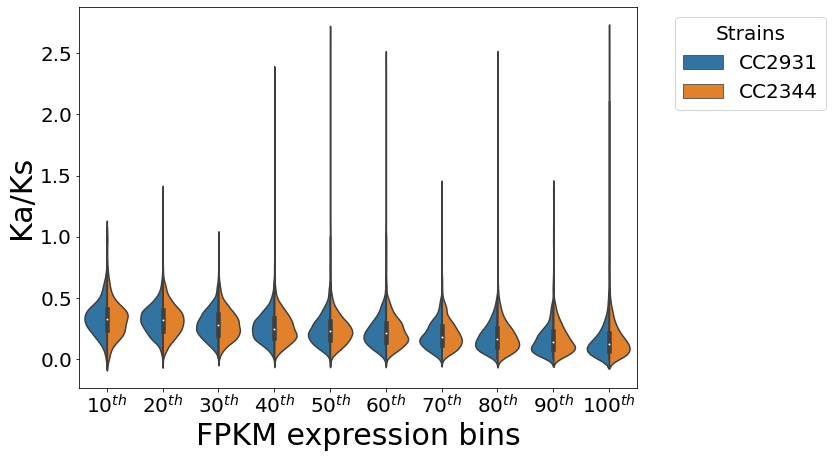

In [5]:
CC2931_avg_fpkm = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/fpkm/CC2931_avg_fpkm', delimiter = '\t')
CC2344_avg_fpkm = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/fpkm/CC2344_avg_fpkm', delimiter = '\t')
divergence = pd.read_csv('/research/projects/chlamydomonas/MAexpression/analysis/divergence/files/edited_divergence_info.txt', delimiter = '\t')
median_results = pd.DataFrame()
CC2344_dic = {}
CC2931_dic = {}

#### Distribution of Ka/Ks per fpkm percentile bins ####
for i in CC2344_bins.keys():
    genes = CC2344_bins[i]
    genes = set.intersection(set(genes), set(divergence['v6'].tolist()))
    section = divergence.loc[divergence['v6'].isin(list(genes))]
    median_results.at['CC2344_' + i, 'median'] = section['k0:k4'].median()
    median_results.at['CC2344_' + i, 'mean'] = section['k0:k4'].mean()
    CC2344_dic[i] = section['k0:k4'].dropna().values.tolist()
CC2344_fpkm_bins = pd.DataFrame({ key:pd.Series(value) for key, value in CC2344_dic.items() })
CC2344_fpkm_bins = pd.melt(CC2344_fpkm_bins, value_vars = CC2344_bins.keys(), var_name = 'bins', value_name = 'k0:k4')

for i in CC2931_bins.keys():
    genes = CC2931_bins[i]
    genes = set.intersection(set(genes), set(divergence['v6'].tolist()))
    section = divergence.loc[divergence['v6'].isin(list(genes))]
    median_results.at['CC2931_' + i, 'median'] = section['k0:k4'].median()
    median_results.at['CC2931_' + i, 'mean'] = section['k0:k4'].mean()
    CC2931_dic[i] = section['k0:k4'].dropna().values.tolist()
CC2931_fpkm_bins = pd.DataFrame({ key:pd.Series(value) for key, value in CC2931_dic.items() })
CC2931_fpkm_bins = pd.melt(CC2931_fpkm_bins, value_vars = CC2931_bins.keys(), var_name = 'bins', value_name = 'k0:k4')

CC2931_fpkm_bins['sample'] = 'CC2931'
CC2344_fpkm_bins['sample'] = 'CC2344'
combined_fpkm = pd.concat([CC2931_fpkm_bins, CC2344_fpkm_bins])
combined_fpkm['bins'] = combined_fpkm['bins'].replace({'perc_10':'$10^{th}$', 'perc_20':'$20^{th}$', 'perc_30':'$30^{th}$', 'perc_40':'$40^{th}$', 
                                 'perc_50':'$50^{th}$', 'perc_60':'$60^{th}$', 'perc_70':'$70^{th}$', 'perc_80':'$80^{th}$', 'perc_90':'$90^{th}$', 'perc_100':'$100^{th}$'})

#### Plotting the distribution of Ka/Ks per fpkm percentile bins #####
plt.figure(figsize = (10, 7))
a = sns.violinplot(data = combined_fpkm, x = 'bins', y = 'k0:k4', hue = 'sample', alpha = 0.2, split = True)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', title = 'Strains', fontsize = 20)
plt.setp(a.get_legend().get_title(), fontsize='20')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel('Ka/Ks', fontsize = 30)
plt.xlabel('FPKM expression bins', fontsize = 30)
plt.savefig('/research/projects/chlamydomonas/MAexpression/analysis/divergence/boxplot_fpkm_vs_ka:ks.pdf', format = 'pdf', dpi = 150, bbox_inches = 'tight')

#### Checking significant differences in the median Ka/Ks between fpkm percentile bins ####
results = pd.DataFrame()
lis = [i for i in CC2344_dic.keys()]
for i in range(len(lis[:-1])): ## All of the distributions were significantly different from each other
    tstat, pval = brunnermunzel(CC2344_dic[lis[i]], CC2344_dic[lis[i+1]], alternative = 'greater')
    results.at[lis[i] + '-' + lis[i+1], 'CC2344_alt_great'] = pval
    tstat, pval = brunnermunzel(CC2931_dic[lis[i]], CC2931_dic[lis[i+1]], alternative = 'greater')
    results.at[lis[i] + '-' + lis[i+1], 'CC2931_alt_great'] = pval
    
    tstat, pval = brunnermunzel(CC2344_dic[lis[i]], CC2344_dic[lis[i+1]], alternative = 'less')
    results.at[lis[i] + '-' + lis[i+1], 'CC2344_alt_less'] = pval
    tstat, pval = brunnermunzel(CC2931_dic[lis[i]], CC2931_dic[lis[i+1]], alternative = 'less')
    results.at[lis[i] + '-' + lis[i+1], 'CC2931_alt_less'] = pval
    
display(results)
display(median_results)

#### Ka/Ks in low vs high expression genes ####
display(brunnermunzel(CC2344_dic['perc_10'], CC2344_dic['perc_100'], alternative = 'greater'))
display(brunnermunzel(CC2931_dic['perc_10'], CC2931_dic['perc_100'], alternative = 'greater'))

In [9]:
divergence

,v5.5_gene,v5.3.1,v5.5,ness_ID,gene,SFS0,SFS4,pi0,pi4,Cincerta_transcript_ID,...,sites4,BetweennessCentrality,SumDegree,InDegree,transcript55,OutDegree,BetweennessCentralitychlamynetUnDirected,DegreechlamynetUnDirected,v6,k0:k4
0,Cre01.g000050,Cre01.g000050.t1.3,Cre01.g000050.t1.1,26903339.0,Cre01.g000050,"[2964, 58, 18, 5, 2, 1, 1, 3, 3, 0, 0, 0, 0, 0...","[982, 30, 8, 7, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...",0.005364,0.008179,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000002,4.0,ChCC-v11000010m.g,NaN
1,Cre01.g000100,Cre01.g000100.t1.3,Cre01.g000100.t1.1,26903974.0,Cre01.g000100,"[4308, 104, 30, 4, 20, 5, 18, 12, 4, 0, 0, 0, ...","[1452, 57, 13, 2, 9, 2, 14, 4, 1, 1, 0, 0, 0, ...",0.010001,0.015073,g13757.t1,...,1414.0,NaN,NaN,NaN,NaN,NaN,0.000089,3.0,ChCC-v11000011m.g,0.599306
2,Cre01.g000150,Cre01.g000150.t1.2,Cre01.g000150.t1.2,26903809.0,Cre01.g000150,"[1542, 13, 4, 2, 10, 1, 1, 1, 1, 0, 0, 0, 0, 0...","[522, 10, 6, 4, 8, 3, 2, 1, 1, 0, 0, 0, 0, 0, ...",0.005366,0.017437,g13756.t1,...,522.0,NaN,NaN,NaN,NaN,NaN,0.000000,1.0,ChCC-v11000015m.g,0.409894
3,Cre01.g000200,Cre01.g000200.t1.3,Cre01.g000200.t1.1,26903011.0,Cre01.g000200,"[1397, 13, 4, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,...","[472, 10, 11, 2, 3, 0, 0, 1, 1, 0, 0, 0, 0, 0,...",0.002380,0.012248,g13755.t1,...,424.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ChCC-v11000021m.g,0.266565
4,Cre01.g000250,Cre01.g000250.t1.2,Cre01.g000250.t1.2,26903028.0,Cre01.g000250,"[474, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[185, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",0.000234,0.004807,g13754.t1,...,189.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ChCC-v11000022m.g,0.203833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17736,Cre09.g401589,g9995.t1,Cre09.g401589.t1.1,26895390.0,g9995,"[607, 36, 7, 3, 4, 6, 7, 9, 6, 6, 0, 0, 0, 0, ...","[210, 8, 4, 0, 1, 3, 5, 3, 4, 1, 0, 0, 0, 0, 0...",0.035451,0.041212,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ChCC-v11019940m.g,NaN
17737,Cre09.g401626,g9996.t1,Cre09.g401626.t1.1,26895834.0,g9996,"[1414, 51, 7, 7, 15, 9, 6, 4, 2, 2, 0, 0, 0, 0...","[479, 19, 7, 10, 6, 4, 3, 1, 0, 0, 0, 0, 0, 0,...",0.016773,0.023302,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ChCC-v11019944m.g,NaN
17738,Cre09.g401663,g9997.t1,Cre09.g401663.t1.1,26895829.0,g9997,"[611, 2, 1, 0, 1, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0...","[136, 9, 0, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0...",0.005007,0.024166,g12983.t1,...,173.0,NaN,NaN,NaN,NaN,NaN,0.000038,14.0,ChCC-v11019950m.g,0.156613
17739,Cre09.g401701,g9998.t1,Cre09.g401701.t1.1,26894958.0,g9998,"[682, 1, 0, 1, 1, 1, 3, 0, 0, 1, 0, 0, 0, 0, 0...","[203, 9, 4, 2, 7, 3, 1, 4, 2, 1, 0, 0, 0, 0, 0...",0.004547,0.043730,g12982.t1,...,237.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ChCC-v11019951m.g,0.136954


In [8]:
for i in CC2344_dic.keys():
    print(len(CC2344_dic[i]))

371
849
1136
1241
1259
1330
1321
1323
1330
1292
